<h1 id ='a', style='text-align:center'> <pd >COVID-19 Open Research Dataset Challenge (CORD-19)</pd></h1>


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
pd.set_option('display.max_columns', None)
import numpy as np

## Perform data exploration on the CORD-19 dataset. Analyze the distribution of articles, authors, publication dates, and other relevant factors.

### Data extraction 

I am gonna extract two embeddings data that looks contain similar information "metadata.csv" and "cord_19_embeddings_2022-06-02.csv"

#### metadata

In [25]:

filename = "D:\\Andres\\Documents\\College\\3 Term\\CSPC 30\\Project\\archive\\metadata.csv"
chunk_size = 1000  # Number of rows to read at a time
full_data=pd.read_csv(filename, chunksize=chunk_size)

In [26]:
df_sample=pd.DataFrame(columns=['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'])

In [27]:
for n,chunk in enumerate(full_data):
    df=pd.DataFrame(chunk)
    len_=df.shape[0]
    df=df.sample(int(len_*0.1),random_state=50)  #extract 5% of each chunk
    df_sample=pd.concat([df_sample,df])
del df

In [28]:
print('Metadata has',str(df_sample.shape[0]/0.1),"rows", ", columns : ",str(df_sample.shape[1]))

Metadata has 1056660.0 rows , columns :  19


#### cord_19_embeddings

In [29]:
filename = "D:\\Andres\\Documents\\College\\3 Term\\CSPC 30\\Project\\archive\\cord_19_embeddings\\cord_19_embeddings_2022-06-02.csv"
chunk_size = 100000  # Number of rows to read at a time
full_data=pd.read_csv(filename, chunksize=chunk_size)

In [30]:
df_sample=pd.DataFrame(columns=['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'])
for n,chunk in enumerate(full_data):
    print(n)
    df=pd.DataFrame(chunk)
    len_=df.shape[0]
    df=df.sample(int(len_*0.1),random_state=50)  #extract 10% of each chunk
    df_sample=pd.concat([df_sample,df])
del df

0
1
2
3
4
5
6
7
8
9
10


In [31]:
print('cord_19_embeddings has',str(df_sample.shape[0]/0.1),"rows", ", columns : ",str(df_sample.shape[1]))

cord_19_embeddings has 1056650.0 rows , columns :  788


In [37]:
df_sample.head()

cord_uid  sha source_x title  doi pmcid pubmed_id license abstract  \
35363      NaN  NaN      NaN   NaN  NaN   NaN       NaN     NaN      NaN   
43649      NaN  NaN      NaN   NaN  NaN   NaN       NaN     NaN      NaN   
60832      NaN  NaN      NaN   NaN  NaN   NaN       NaN     NaN      NaN   
37399      NaN  NaN      NaN   NaN  NaN   NaN       NaN     NaN      NaN   
61034      NaN  NaN      NaN   NaN  NaN   NaN       NaN     NaN      NaN   

      publish_time  ... -0.7419174313545227 3.3947110176086426  \
35363          NaN  ...            3.249924           3.262590   
43649          NaN  ...            1.894464           1.083395   
60832          NaN  ...           -2.474804          -1.564299   
37399          NaN  ...            2.702326          -1.125198   
61034          NaN  ...            1.676576           1.226383   

      3.163691282272339 1.3728902339935303 -4.107113361358643  \
35363          3.652240           5.242158          -4.759593   
43649         -2.997971           0.200026           1.028709   
60832          6.064905           4.532759           2.219285   
37399         -1.422237           1.278239           1.459751   
61034          0.948799          -1.410050          -4.305623   

      -3.8174145221710205 1.8976187705993652 5.811529159545898  \
35363           -4.741589           0.822273          3.188028   
43649            0.080837           1.298996         -4.900143   
60832           -5.727299           1.075999          3.401037   
37399           -0.380270           2.299761          0.078413   
61034            1.024276           2.264008         -4.395139   

      -2.9323840141296387 0.30520474910736084  
35363           -0.316626            0.772338  
43649            0.364922           -0.666875  
60832           -3.157341           -0.621473  
37399            0.943148           -2.815276  
61034            3.337003           -3.436711  

[5 rows x 788 columns]

<div class="alert alert-block alert-info">
<p style='text-align:center' >Both dataset has the same rows but different columns. "cord_19_embeddings" contains unuseful a high number of columns where is not specified. So I am going to choose metadata.csv instead</p>

In [45]:
del df_sample

In [3]:

filename = "D:\\Andres\\Documents\\College\\3 Term\\CSPC 30\\Project\\archive\\metadata.csv"
chunk_size = 10000  # Number of rows to read at a time
full_data=pd.read_csv(filename, chunksize=chunk_size)
metadata=pd.DataFrame(columns=['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'])
for n,chunk in enumerate(full_data):
    df=pd.DataFrame(chunk)
    len_=df.shape[0]
    #df=df.sample(int(len_),random_state=50)  #complete dataset
    metadata=pd.concat([metadata,df])
del df
print('Metadata has',str(metadata.shape[0]),"rows", ", columns : ",str(metadata.shape[1]))

Metadata has 1056660 rows , columns :  19


### missing values

#### pick out patterns in data completion.

Authors contains value as "nan"

<Axes: >

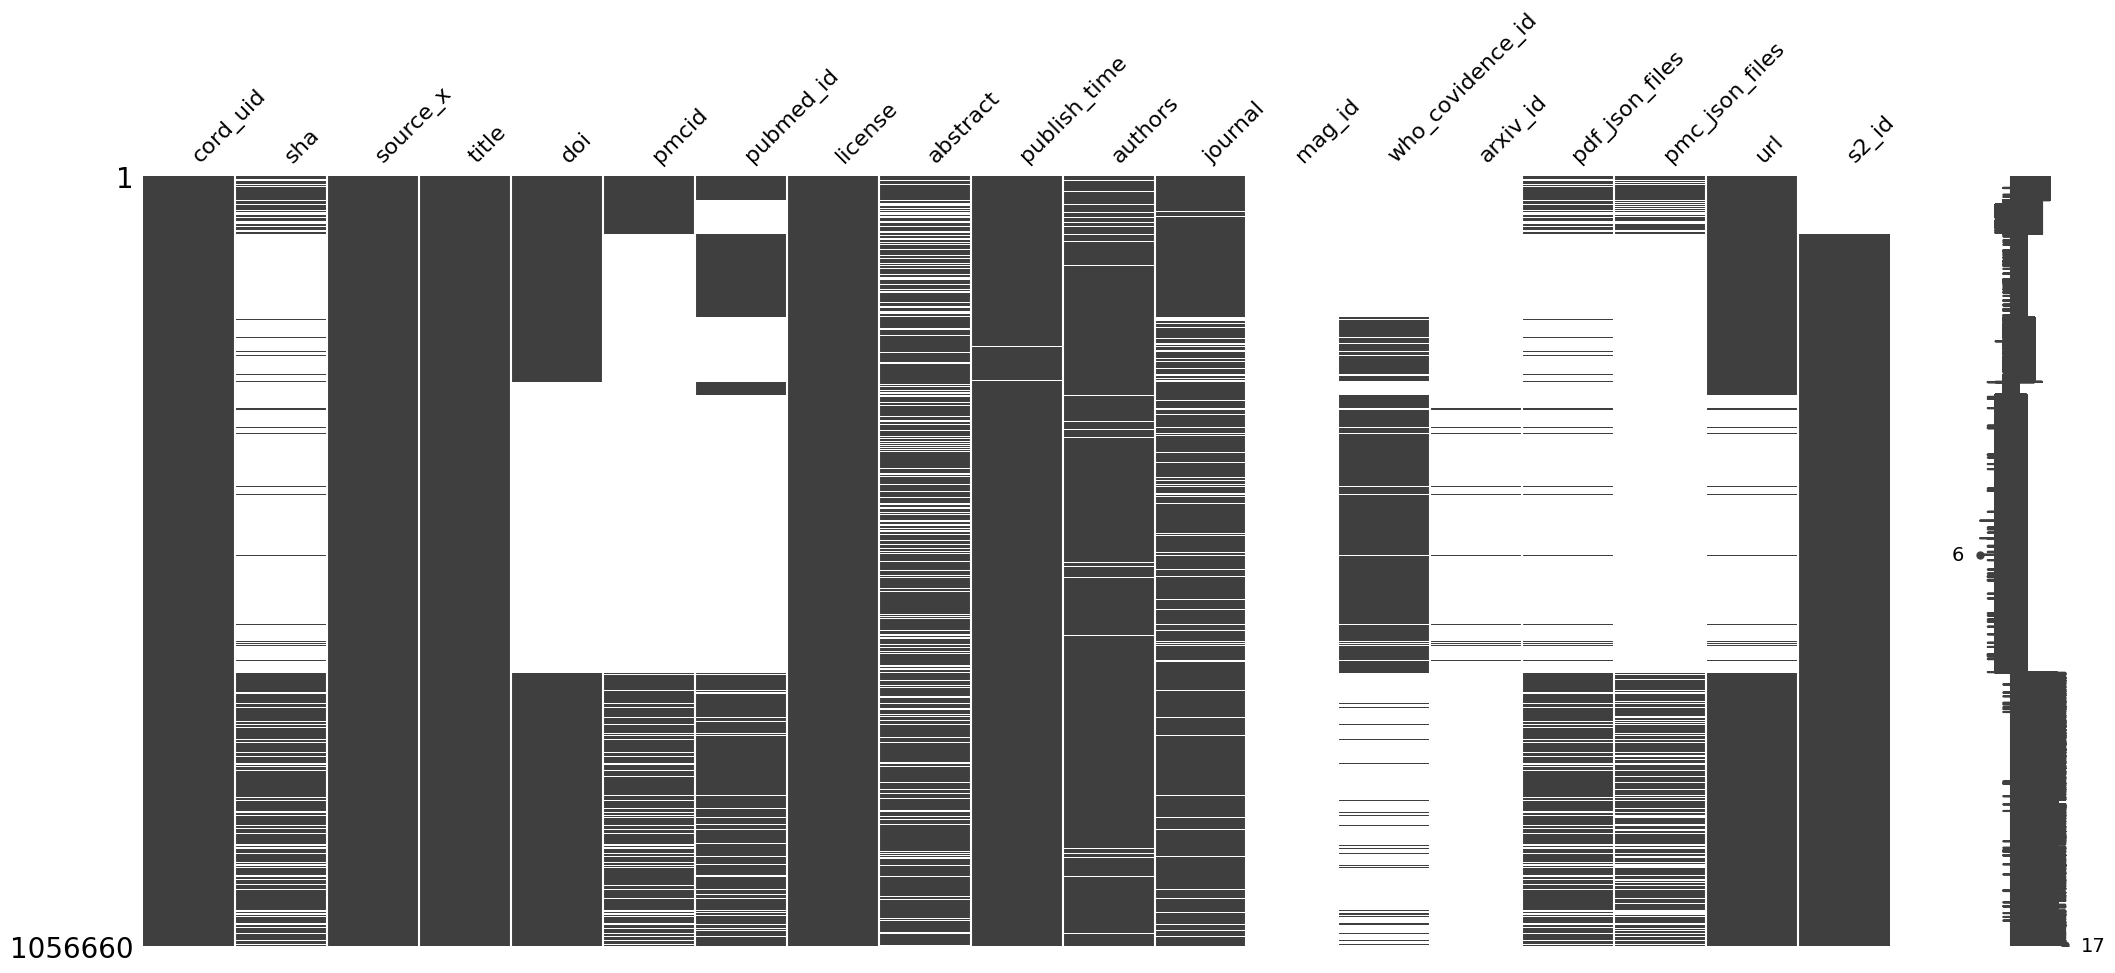

In [192]:
msno.matrix(metadata)

In [193]:
metadata[pd.isna(metadata.doi)].publish_time.value_counts()

publish_time
2020          193955
2021          166195
2022            8677
2004            1074
2006            1045
               ...  
2014-02-14         1
2019-09-09         1
2017-05-06         1
1993-06-02         1
2002-12-03         1
Name: count, Length: 1610, dtype: int64

#### how strongly the presence or absence of one variable affects the presence of another:

<Axes: >

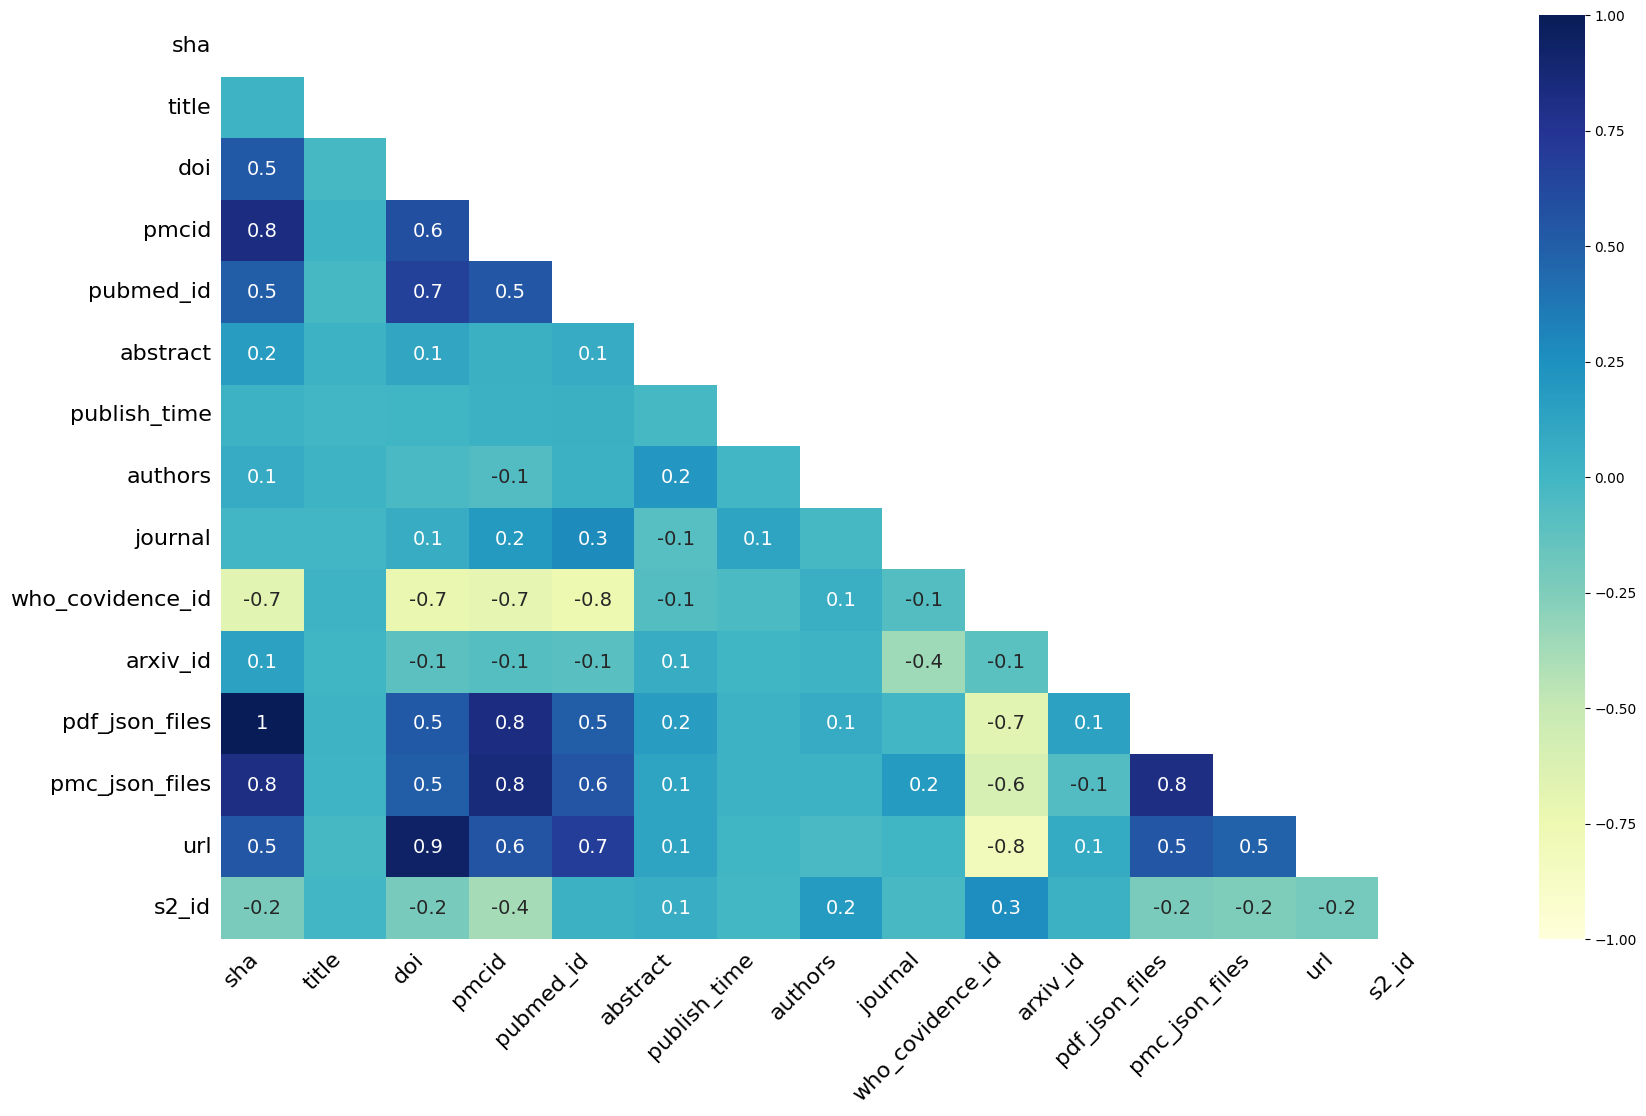

In [194]:
msno.heatmap(metadata, cmap='YlGnBu')

#### revealing trends deeper than the pairwise ones visible in the correlation heatmap:

<Axes: >

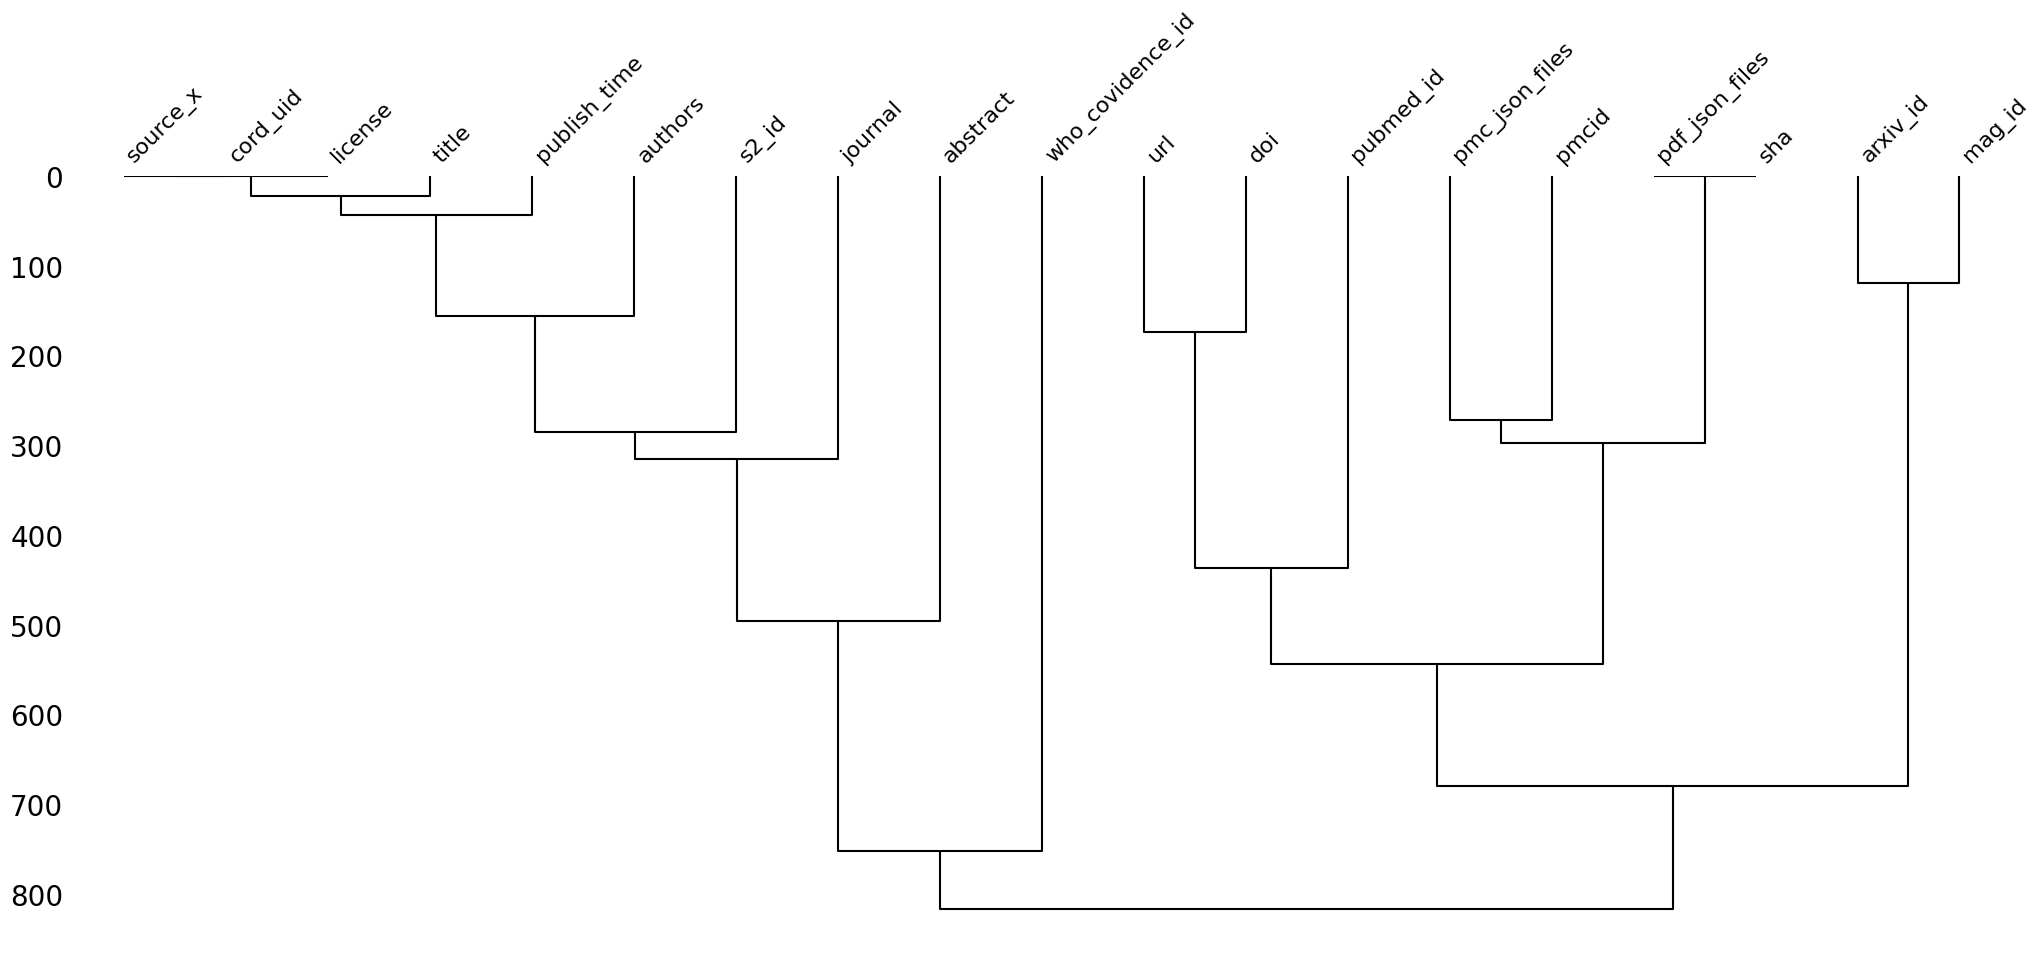

In [195]:
msno.dendrogram(metadata)

### Exploratory data analysis

In [196]:
metadata.head()

cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

#### source_x

In [197]:
metadata.source_x.unique()

array(['PMC', 'Medline', 'WHO', 'ArXiv', 'BioRxiv', 'MedRxiv', 'Elsevier',
       'Medline; PMC', 'Medline; PMC; WHO', 'Elsevier; Medline; PMC',
       'PMC; WHO', 'Medline; WHO', 'MedRxiv; WHO',
       'Elsevier; Medline; PMC; WHO', 'Elsevier; PMC',
       'Elsevier; PMC; WHO', 'BioRxiv; WHO', 'ArXiv; Medline; PMC; WHO',
       'BioRxiv; Medline; PMC; WHO', 'ArXiv; WHO',
       'MedRxiv; Medline; PMC', 'BioRxiv; MedRxiv',
       'BioRxiv; Medline; PMC', 'MedRxiv; Medline; PMC; WHO',
       'MedRxiv; Medline; WHO', 'ArXiv; Elsevier; Medline; PMC; WHO',
       'BioRxiv; Medline; WHO', 'ArXiv; Medline; PMC',
       'Elsevier; Medline', 'BioRxiv; Medline', 'BioRxiv; MedRxiv; WHO',
       'ArXiv; Elsevier; Medline; PMC', 'ArXiv; Medline',
       'ArXiv; Medline; WHO', 'ArXiv; PMC; WHO',
       'BioRxiv; MedRxiv; Medline; PMC', 'BioRxiv; MedRxiv; Medline; WHO',
       'ArXiv; MedRxiv', 'BioRxiv; MedRxiv; Medline; PMC; WHO',
       'ArXiv; PMC', 'MedRxiv; PMC', 'MedRxiv; Medline', 'Elsevier;

In [198]:
unique_source=metadata.source_x.apply(lambda x:x.split(';')).reset_index().explode('source_x').set_index('index')
unique_source.source_x.unique()

array(['PMC', 'Medline', 'WHO', 'ArXiv', 'BioRxiv', 'MedRxiv', 'Elsevier',
       ' PMC', ' WHO', ' Medline', ' MedRxiv', ' Elsevier'], dtype=object)

There are two 'WHO'

In [199]:
unique_source.source_x=unique_source.source_x.apply(lambda x:x.strip())

In [200]:
unique_source=unique_source.value_counts().reset_index()
unique_source

source_x   count
0       WHO  613500
1   Medline  464742
2       PMC  389571
3  Elsevier   84824
4   MedRxiv   20336
5     ArXiv   14249
6   BioRxiv    8915

<Axes: xlabel='source_x', ylabel='count'>

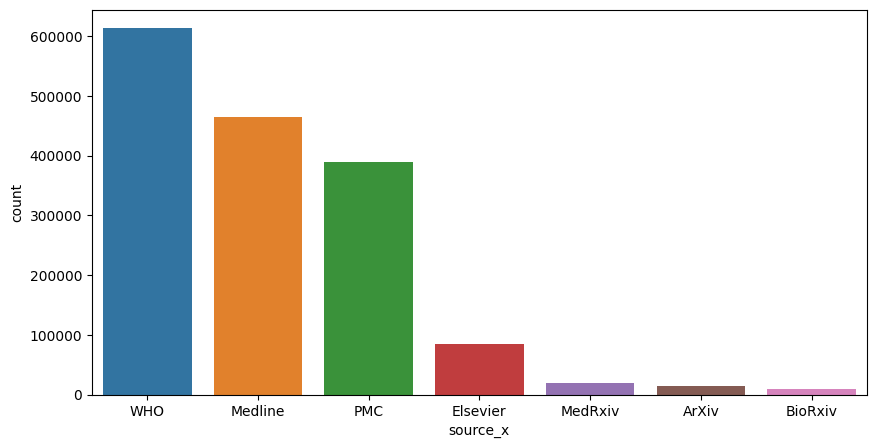

In [201]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=unique_source,
    x='source_x',
    y='count'
)

#### licence

<Axes: title={'center': 'Count of type of licence'}, xlabel='license'>

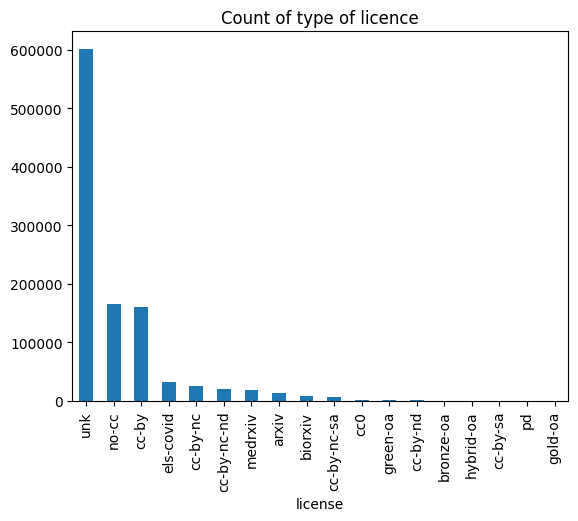

In [202]:
metadata.license.value_counts().plot(kind='bar',title='Count of type of licence')

#### publish_time

In [203]:
metadata['publish_time'].sort_values(key=lambda x:x.str.len())

528944    2020
463001    2020
463002    2020
463003    2020
463004    2020
          ... 
679555     NaN
679705     NaN
681192     NaN
681323     NaN
681580     NaN
Name: publish_time, Length: 1056660, dtype: object

<div class="alert alert-block alert-info">
<p style='text-align:center' >As some publication date only has year, the analysis will be done by year  </p>

In [204]:
publish_year=metadata['publish_time'].apply(lambda x:str(x)[0:4])
publish_year=publish_year.value_counts().reset_index().sort_values('publish_time')
publish_year

publish_time   count
91          1825       1
102         1836       1
75          1856       3
107         1857       1
84          1860       2
..           ...     ...
0           2021  453225
2           2022  128431
55          2023      17
110         2024       1
20           nan    1814

[124 rows x 2 columns]

Text(0.5, 1.0, 'Publish time throught the time')

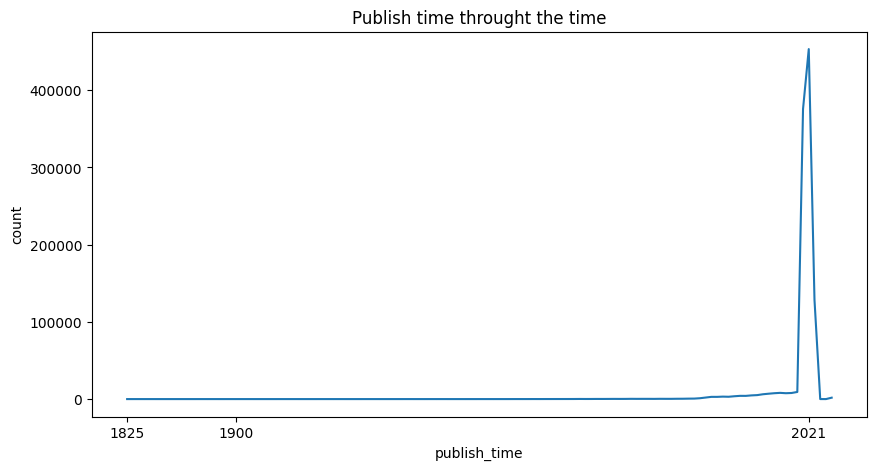

In [205]:
plt.figure(figsize=(10,5))
sns.lineplot(data=publish_year,
            x='publish_time',
            y='count')
plt.xticks(['1825','1900','2021'])
plt.title('Publish time throught the time')

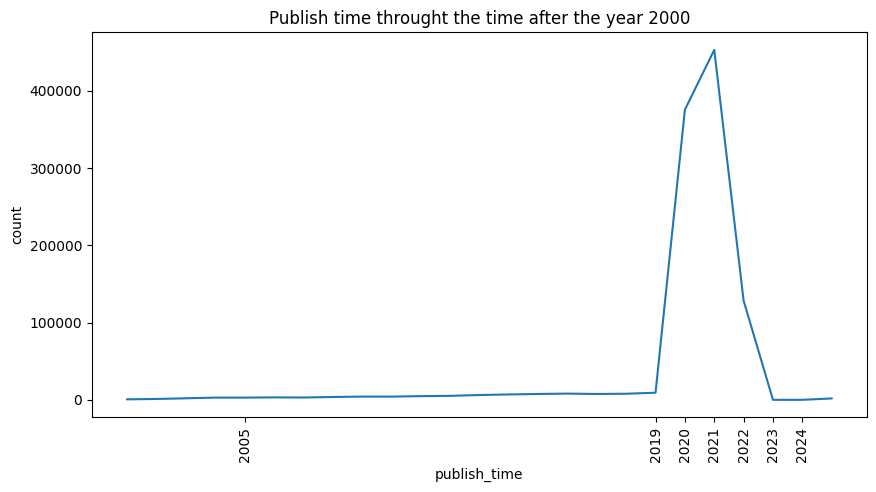

In [206]:
plt.figure(figsize=(10,5))
sns.lineplot(data=publish_year[publish_year.publish_time>'2000'],
            x='publish_time',
            y='count')
plt.xticks(['2005','2019','2020','2021','2022','2023','2024'])
plt.title('Publish time throught the time after the year 2000')
plt.xticks(rotation=90)
plt.show()

#### authors

In [207]:
authors=metadata.authors.apply(lambda x:str(x).split(';')).reset_index().explode('authors')
print('Total authors :',len(authors.authors.unique()))

Total authors : 2613407


In [211]:
authors.authors=authors.authors.apply(lambda x:x.strip())
authors_counts=authors.authors.value_counts()
authors_counts=authors_counts.reset_index()
authors_counts

authors  count
0                          nan  23869
1                   Anonymous,   3904
2                        O039,   2532
3                        D039,   1689
4                    Wang, Wei    825
...                        ...    ...
2399532          Vos, Dagmar I      1
2399533      Winkes, Michiel B      1
2399534  Schormans, Philip M J      1
2399535  Berende, Cornelis A S      1
2399536    Illuzzi, Jessica L.      1

[2399537 rows x 2 columns]

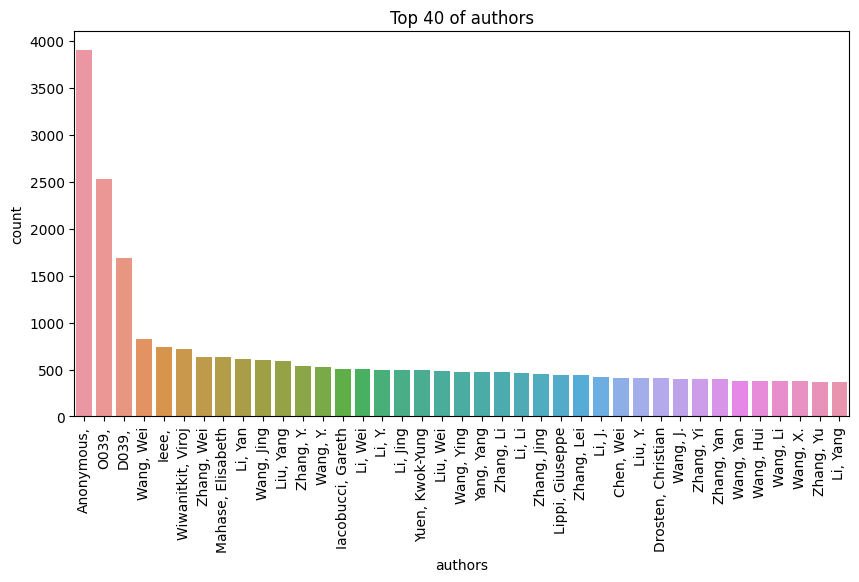

In [212]:
plt.figure(figsize=(10,5))
sns.barplot(data=authors_counts.iloc[1:40,],x='authors',y='count')
plt.title('Top 40 of authors')
plt.xticks(rotation=90)
plt.show()

### Distribution of Target Tables

In [4]:
table_location = "D:\\Andres\\Documents\\College\\3 Term\\CSPC 30\\Project\\archive\\Kaggle\\target_tables\\0_table_formats_and_column_definitions\\list_of_tables_and_table_formats.xlsx"
tables=pd.read_excel(table_location, usecols='A:F')
tables

Table Name  \
0      What do we know about viral shedding in stool?   
1   What do we know about viral shedding in the na...   
2      What do we know about viral shedding in urine?   
3      What do we know about viral shedding in blood?   
4   How long can the 2019-nCoV virus remain viable...   
..                                                ...   
70                              Race: Asian vs. White   
71                              Race: Other vs. White   
72                        Chronic digestive disorders   
73                               Autoimmune disorders   
74                             Neurological disorders   

               Table Header  Table Format  Table Order  \
0    Persistence of sources             5            1   
1    Persistence of sources             5            2   
2    Persistence of sources             5            3   
3    Persistence of sources             5            4   
4   Persistence on surfaces             5            5   
..                      ...           ...          ...   
70             Risk Factors             8           71   
71             Risk Factors             8           72   
72             Risk Factors             8           73   
73             Risk Factors             8           74   
74             Risk Factors             8           75   

                                            File Name  \
0   What do we know about viral shedding in stool_...   
1   What do we know about viral shedding in the na...   
2   What do we know about viral shedding in urine_...   
3   What do we know about viral shedding in blood_...   
4   How long can the 2019-nCoV virus remain viable...   
..                                                ...   
70                          Race_ Asian vs. White.csv   
71                          Race_ Other vs. White.csv   
72                    Chronic digestive disorders.csv   
73                           Autoimmune disorders.csv   
74                         Neurological disorders.csv   

                         Curator  
0   Justin Zaremba, Shaan Sharma  
1                 Justin Zaremba  
2                 Justin Zaremba  
3                 Justin Zaremba  
4                 Jamie Geraghty  
..                           ...  
70                  Savanna Reid  
71                  Savanna Reid  
72                  Savanna Reid  
73                  Savanna Reid  
74                  Savanna Reid  

[75 rows x 6 columns]

### Tables Header

In [214]:
tables['Table Header'].value_counts()

Table Header
Risk Factors                                            28
Non-pharmaceutical Interventions                         8
Adaptation of Virus                                      6
Persistence of sources                                   4
Diagnostics                                              4
Social and Ethical Considerations                        4
Incubation period                                        3
Physical science                                         3
Asymptomatic shedding                                    3
Natural history of the virus                             3
Persistence on surfaces                                  2
Seasonality                                              2
Vaccine and Therapeutics                                 2
Medical care                                             2
Information sharing and inter-sectoral collaboration     1
Name: count, dtype: int64

### Files per Tables format

<Axes: title={'center': 'Percentage of amount of files per Format'}, xlabel='Table Format'>

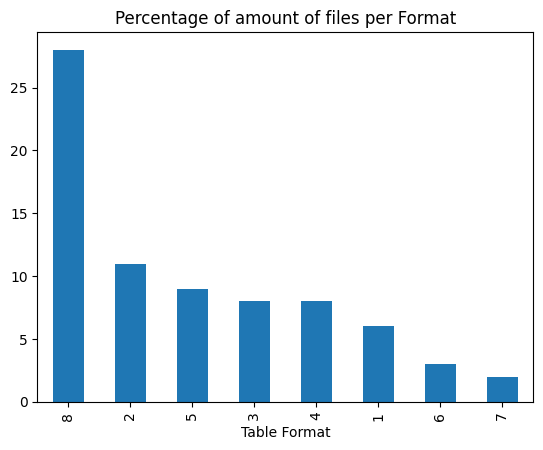

In [215]:
tables['Table Format'].value_counts().plot(kind='bar',title='Percentage of amount of files per Format')

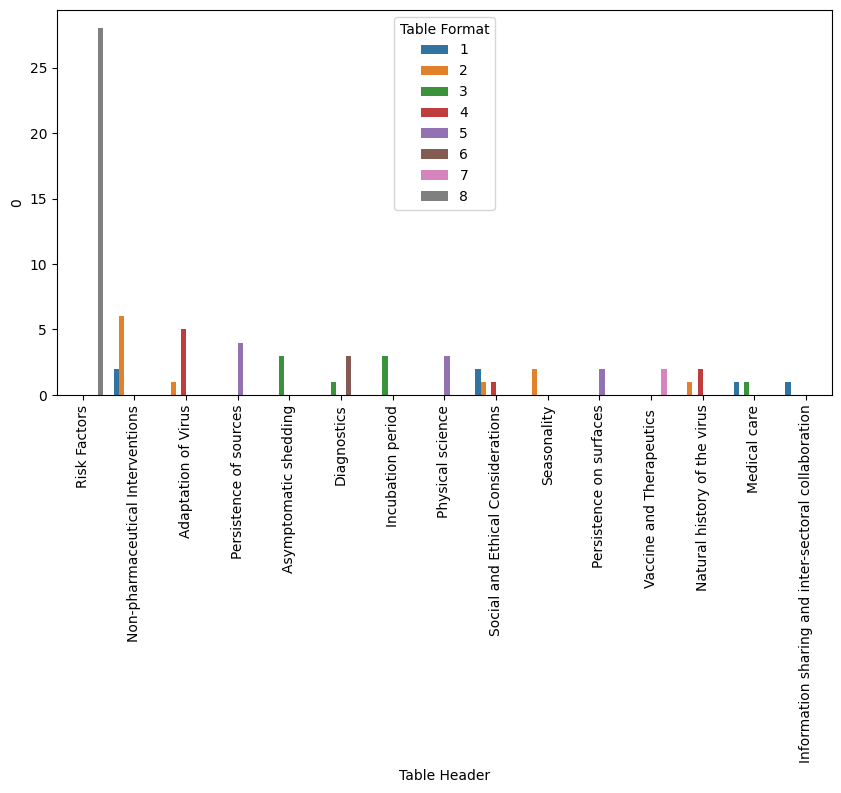

In [216]:
count_T=tables[['Table Header','Table Format']].value_counts().reset_index()
#sns.barplot(data=count_T.set_index(['Table Header','Table Format']))
count_T=count_T.set_index(['Table Header','Table Format'])
plt.figure(figsize=(10,5))
sns.barplot(data=count_T.stack().reset_index(),x='Table Header',y=0,hue='Table Format')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<p style='text-align:center' >All Risk Factors are structured with the format number 8</p>

<div class="alert alert-block alert-info">
<p style='text-align:center' >The table format is not necessarily determined by the table header. Each table format has its own distinct columns.</p>

### Articles per Format number

In [5]:
import os
maindir="D:\\Andres\\Documents\\College\\3 Term\\CSPC 30\\Project\\archive\\Kaggle\\target_tables"
folders=os.listdir(maindir)
subfolders=list(filter(lambda x:x not in ['unsorted_tables',"0_table_formats_and_column_definitions"],folders))
folder_dict={}
folder_main=[]
for n,i in enumerate(subfolders):
    n+=1
    #i=i.replace(str(n)+"_",'')
    folder_dict[i]=os.listdir(maindir+"\\"+i)

In [6]:
tables_files={}
subfolder={}
for key,list_files in folder_dict.items():
    subfolder[key]=list_files
    for file in list_files:
        df=pd.read_csv(maindir+"\\"+key+"\\"+file)
        tables_files[file]=df

In [7]:
format_name=[]
file_name=[]
articles=[]
dates=[]
list_dates=[]
dict_dates={}
for i in subfolder:
    numb_files=len(subfolder[i])
    for file in range(numb_files):
        format_name.append(i)
        file_name.append(subfolder[i][file])
        articles.append(len(tables_files[subfolder[i][file]]))
        col=list(filter(lambda x:str(x).lower().find('date')!=-1,tables_files[subfolder[i][file]].columns))
        dates.append(tables_files[subfolder[i][file]][col])
        ##
    structure_df=pd.DataFrame({'Format':format_name,'File name':file_name,'number Article':articles,"Date":dates})
    structure_df.sort_values(by='number Article',ascending=False,inplace=True)
    structure_df_group=structure_df.groupby(by='Format')['number Article'].sum().reset_index()
    structure_df_group

    for ix,row in structure_df.loc[structure_df.Format==i].iterrows():
        list_dates.extend(list(row.Date.values.flatten()))
    dict_dates[i]=list_dates


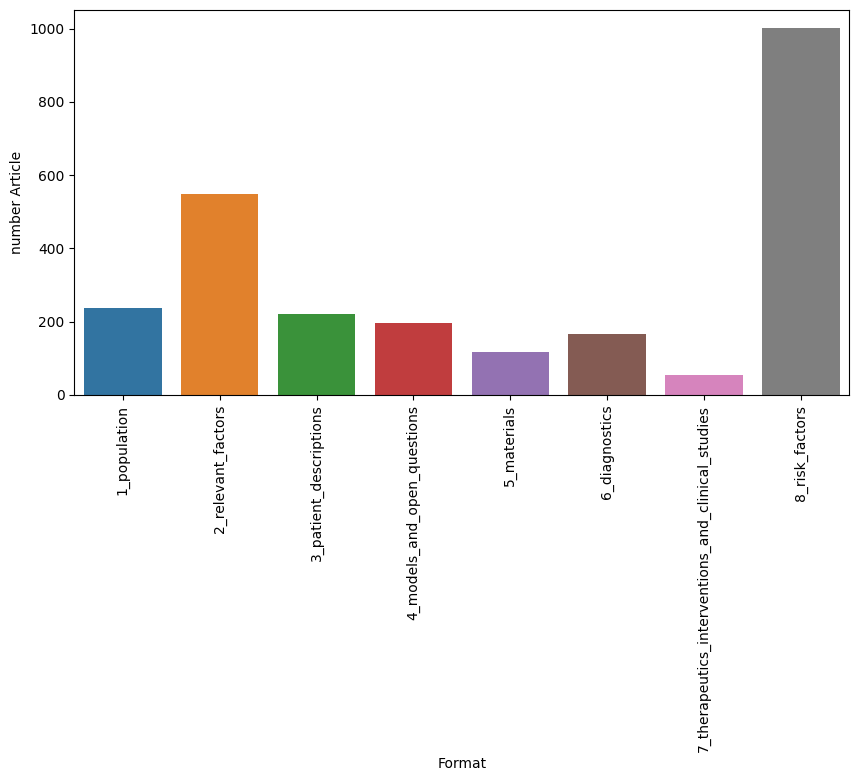

In [228]:
plt.figure(figsize=(10,5))
sns.barplot(data=structure_df_group,x='Format',y='number Article')
plt.xticks(rotation=90)
plt.show()

### Publish date per Format

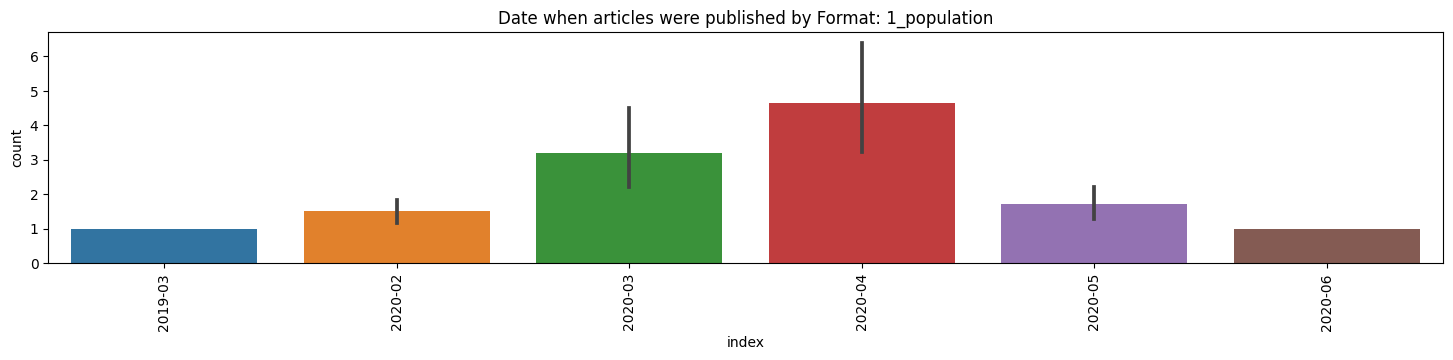

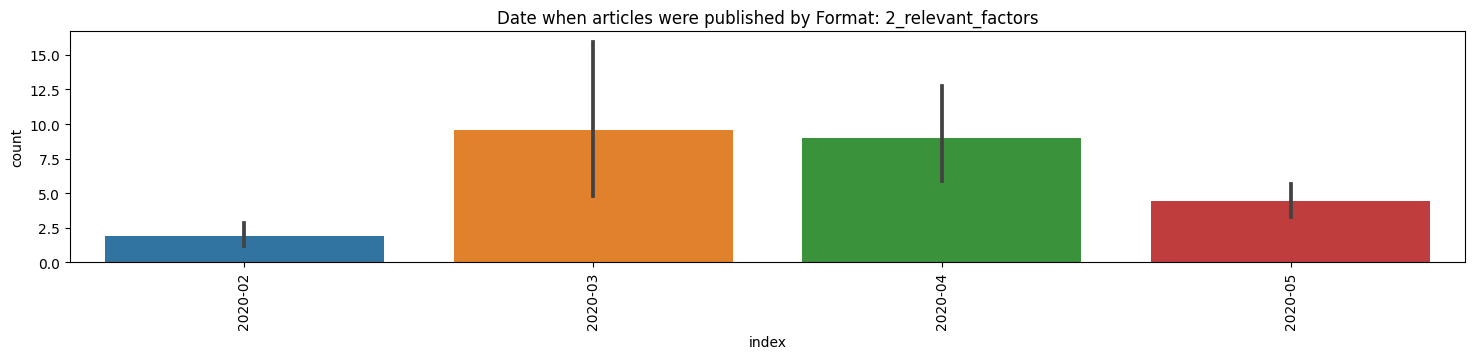

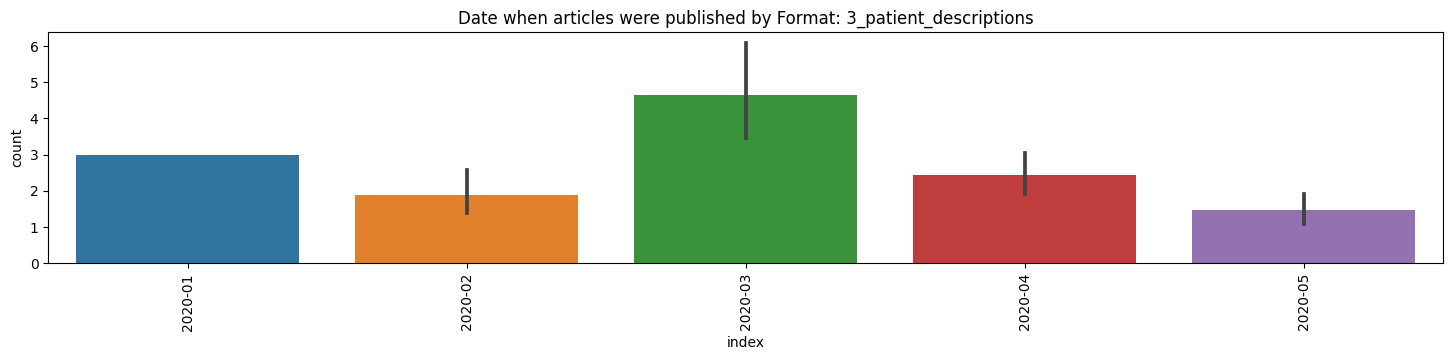

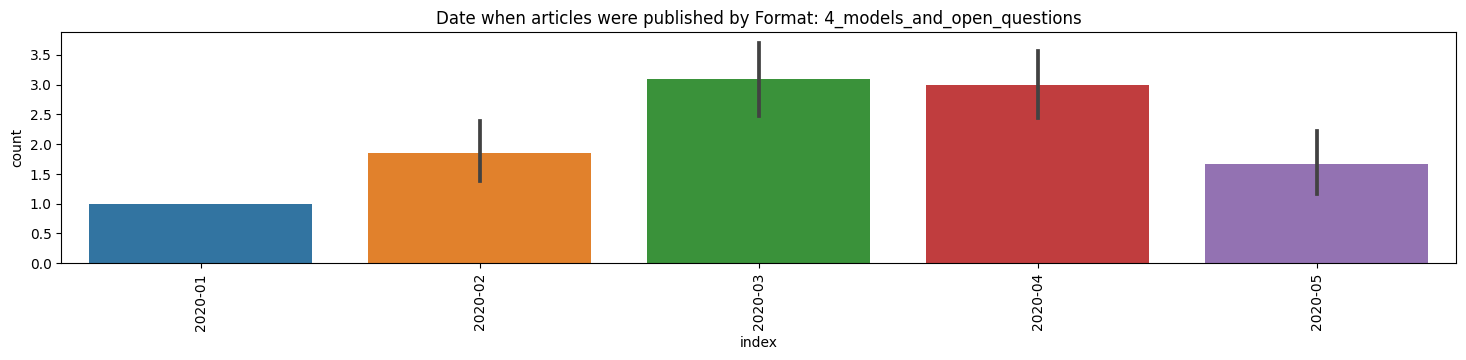

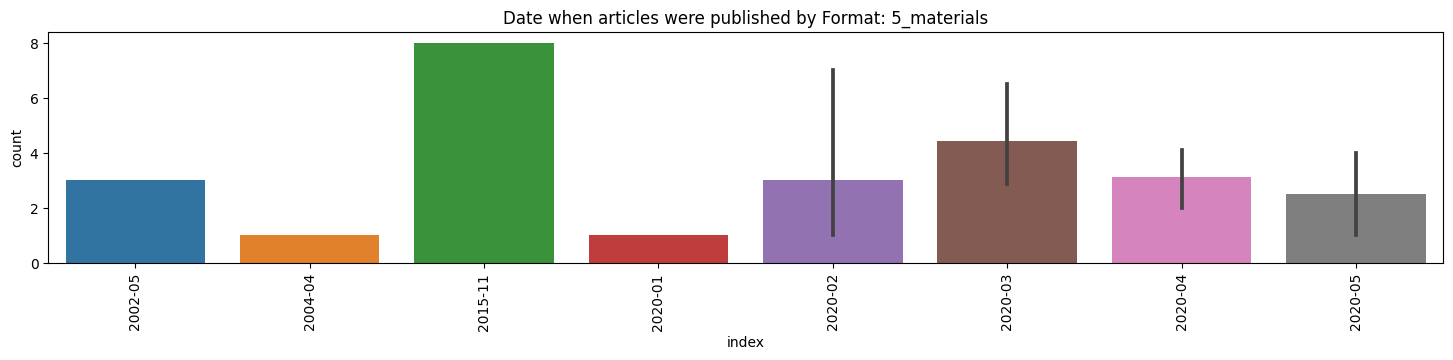

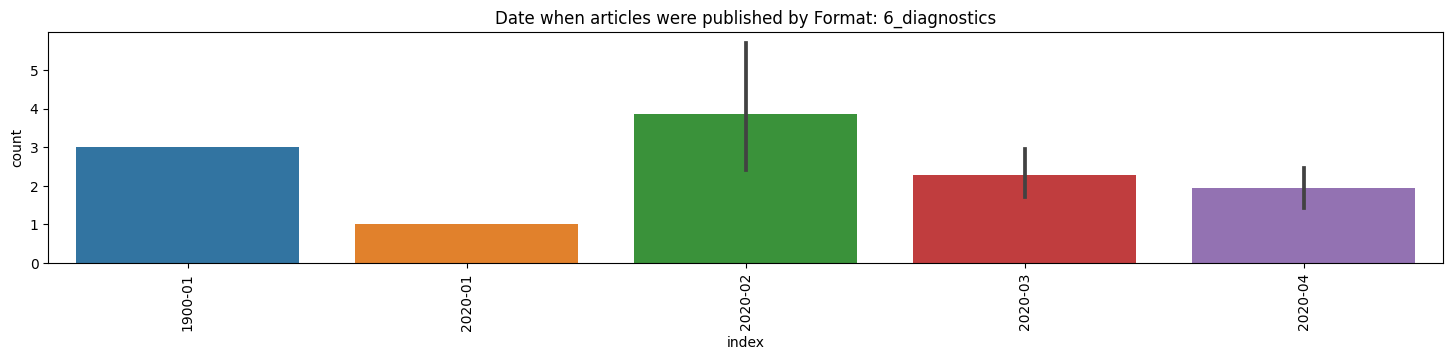

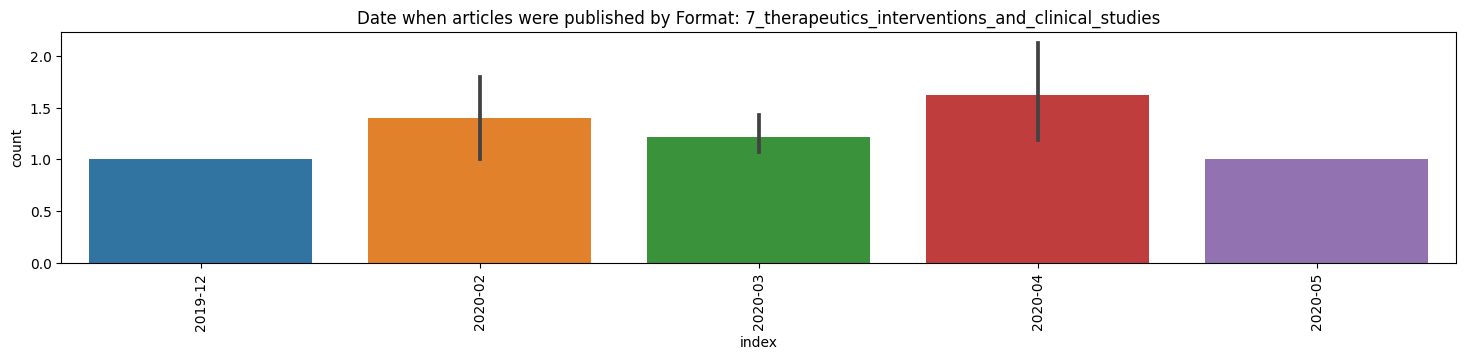

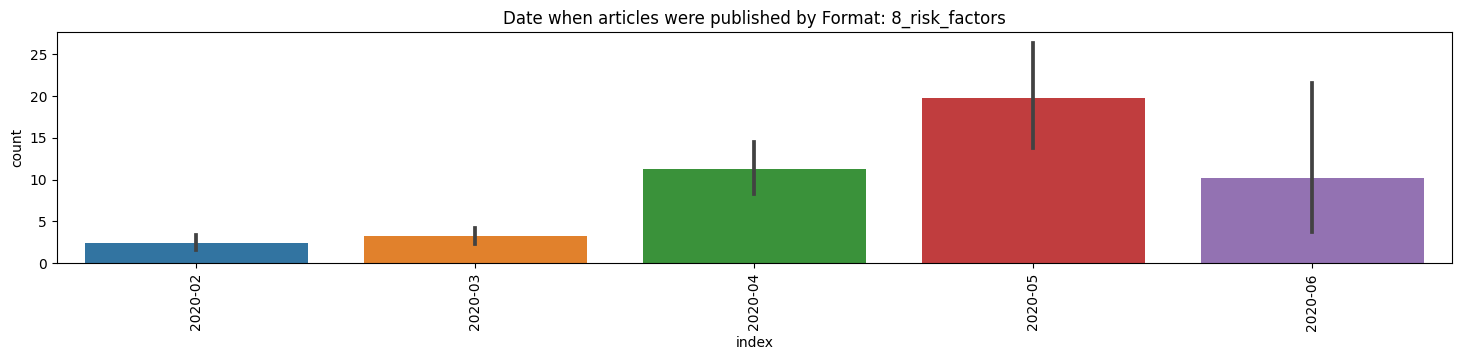

In [229]:
import numpy as np
from dateutil.parser import parse
for i in dict_dates.keys():
    list_dates=[]

    for ix,row in structure_df.loc[structure_df.Format==i].iterrows():
        list_dates.extend(list(row.Date.values.flatten()))

    unique_dates=pd.Series(list_dates).value_counts().reset_index()
    unique_dates.sort_values(by='index',ascending=True,inplace=True)
    unique_dates['index']=list(map(lambda x:str(x).replace('//','/').replace('-','/').replace('Unknown','1900/01/01'),unique_dates['index']))
    
    unique_dates['index']=[parse(date) for date in unique_dates['index']]
    
    unique_dates['index']=pd.to_datetime(unique_dates['index'],format="%m/%d/%Y").dt.to_period('M')

    plt.figure(figsize=(18,3))
    sns.barplot(data=unique_dates,x='index',y='count',order=unique_dates['index'].sort_values().unique())
    plt.title('Date when articles were published by Format: {}'.format(i))
    plt.xticks(rotation=90)
    plt.show()

### Publish Date 

In [8]:
all_dates=[]
for i in dict_dates.keys():
    all_dates.extend(dict_dates[i])

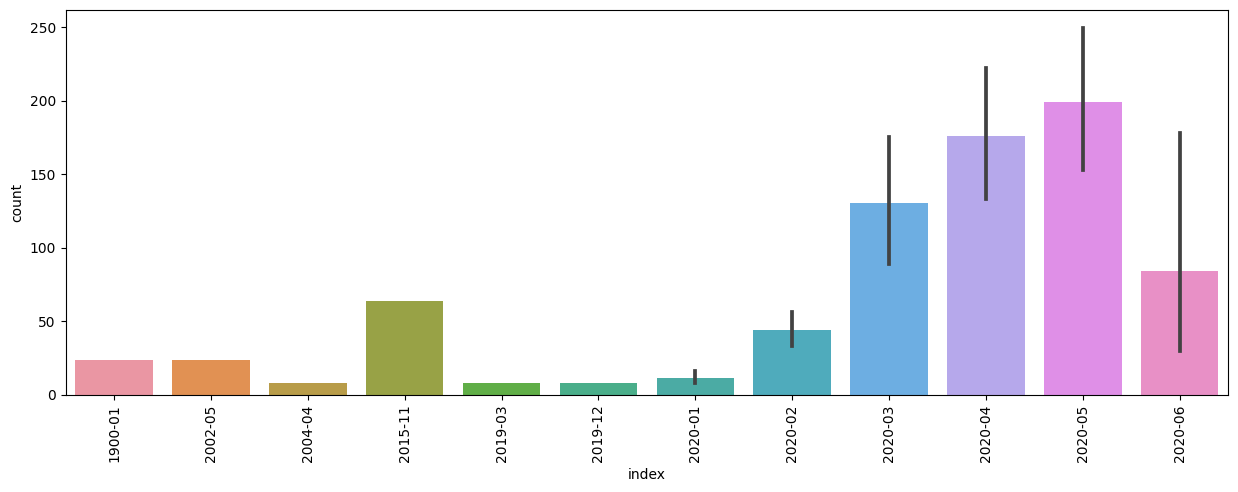

In [231]:
unique_dates=pd.Series(all_dates).value_counts().reset_index()
unique_dates.sort_values(by='index',ascending=True,inplace=True)
unique_dates['index']=list(map(lambda x:str(x).replace('//','/').replace('-','/').replace('Unknown','1900/01/01'),unique_dates['index']))
unique_dates['index']=[parse(date) for date in unique_dates['index']]
unique_dates['index']=pd.to_datetime(unique_dates['index']).dt.to_period('M')
#unique_dates['index'].set_index('index',inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(data=unique_dates,x='index',y='count',order=unique_dates['index'].sort_values().unique())

#plt.title('Format ')
plt.xticks(rotation=90)
plt.show()

### Study Type per Format 

In [9]:
dict_formats={}
for format_ in subfolder.keys():
    for n,file in enumerate(subfolder[format_]):
        df=tables_files[subfolder[format_][n]]
        if format_=='8_risk_factors':
            df=df[['Date', 'Study', 'Study Link', 'Journal','Multivariate adjustment', 'Study Type',
       'Sample Size', 'Study Population', 'Added on']]
        if n==0:
            df_base=pd.DataFrame(columns=df.columns)
        df_base=pd.concat([df_base,df])
        df_base=df_base.drop_duplicates() # drop articles duplicated
        dict_formats[format_]=df_base.reset_index(drop=True)
        

In [10]:
studyType={}
for n,i in enumerate(dict_formats.keys()):
    res=list(dict_formats[i]['Study Type'])
    studyType[i]=pd.Series(res)
    countdf=pd.Series(res).value_counts().reset_index()#.unstack()
    countdf.loc[:,'label']=i
    if n==0:
        df_base=pd.DataFrame(columns=countdf.columns)
    df_base=pd.concat([df_base,countdf])
df_base['index']=df_base['index'].apply(lambda x:str(x).title())

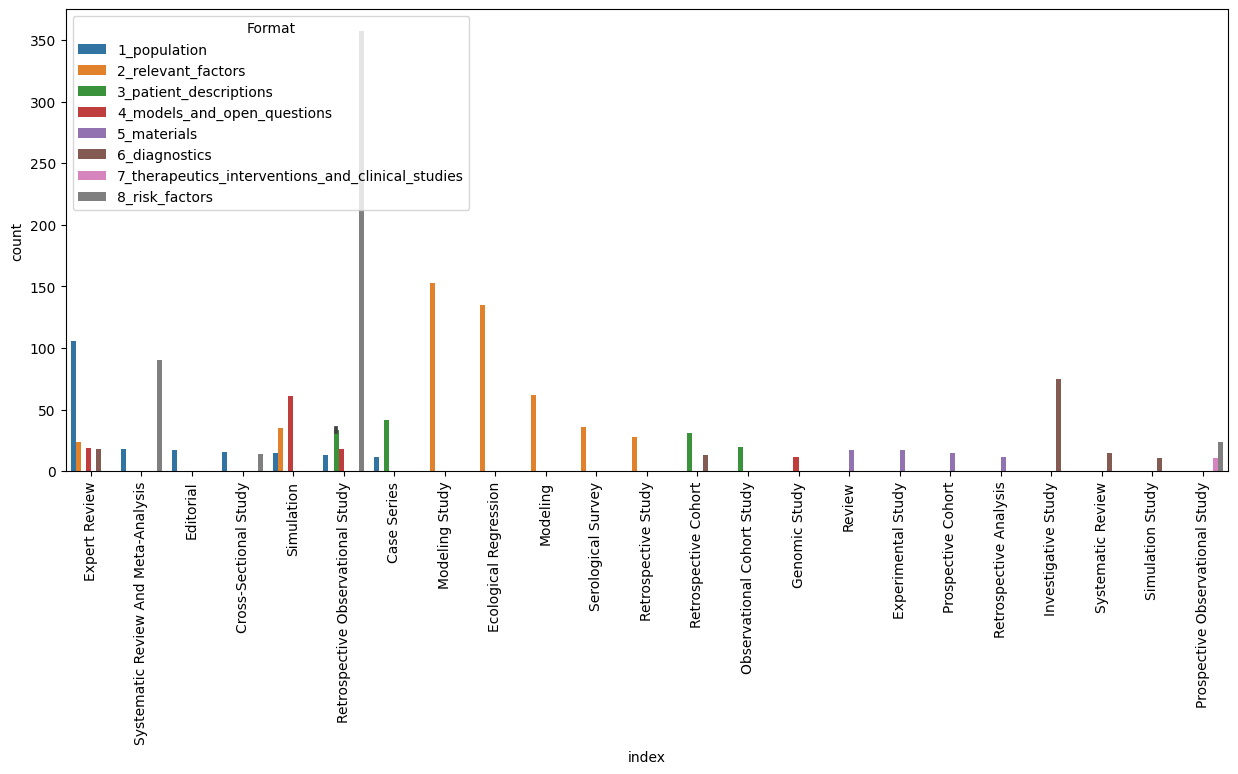

In [99]:
plt.figure(figsize=(15,6))
sns.barplot(data=df_base[df_base['count']>10],x='index',y='count',hue='label')
plt.xticks(rotation=90)
plt.legend(title='Format')
plt.show()

## Preprocess the textual data using techniques like tokenization, stop-word removal, and stemming. Explaining the rationale behind your preprocessing choices.

In [11]:
import nltk
nltk.download('stopwords')
import gensim
from gensim import corpora, models
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acvil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
metadata[metadata.title=='Phenotypic characteristics and prognosis of inpatients with COVID-19 and diabetes: the CORONADO study']

cord_uid                                                sha  \
555148  06x0cei2                                                NaN   
555149  06x0cei2                                                NaN   
984966  97j1gt5k  3e723852a2b7be49f3f3c9b0ad6cb0eab04f9a36; 6b64...   

            source_x                                              title  \
555148           WHO  Phenotypic characteristics and prognosis of in...   
555149           WHO  Phenotypic characteristics and prognosis of in...   
984966  Medline; PMC  Phenotypic characteristics and prognosis of in...   

                               doi       pmcid   pubmed_id license  \
555148                         NaN         NaN         NaN     unk   
555149                         NaN         NaN         NaN     unk   
984966  10.1007/s00125-020-05180-x  PMC7256180  32472191.0   cc-by   

                                                 abstract publish_time  \
555148  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...         2020   
555149  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...         2020   
984966  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...   2020-05-29   

                                                  authors       journal  \
555148  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...  Diabetologia   
555149  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...  Diabetologia   
984966  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...  Diabetologia   

        mag_id who_covidence_id arxiv_id  \
555148     NaN          #422785      NaN   
555149     NaN        #32472191      NaN   
984966     NaN              NaN      NaN   

                                           pdf_json_files  \
555148                                                NaN   
555149                                                NaN   
984966  document_parses/pdf_json/3e723852a2b7be49f3f3c...   

                                      pmc_json_files  \
555148                                           NaN   
555149                                           NaN   
984966  document_parses/pmc_json/PMC7256180.xml.json   

                                                      url        s2_id  
555148                                                NaN  218977920.0  
555149                                                NaN  218977920.0  
984966  https://www.ncbi.nlm.nih.gov/pubmed/32472191/;...  218977920.0

In [13]:
metadata.shape

(1056660, 19)

In [14]:
metadata_unique=metadata.drop_duplicates(subset='s2_id')
metadata_unique.shape

(678263, 19)

In [15]:
metadata_unique[metadata_unique.title=='Phenotypic characteristics and prognosis of inpatients with COVID-19 and diabetes: the CORONADO study']

cord_uid  sha source_x  \
555148  06x0cei2  NaN      WHO   

                                                    title  doi pmcid  \
555148  Phenotypic characteristics and prognosis of in...  NaN   NaN   

       pubmed_id license                                           abstract  \
555148       NaN     unk  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...   

       publish_time                                            authors  \
555148         2020  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...   

             journal  mag_id who_covidence_id arxiv_id pdf_json_files  \
555148  Diabetologia     NaN          #422785      NaN            NaN   

       pmc_json_files  url        s2_id  
555148            NaN  NaN  218977920.0

The column to identify duplicate is s2_id

In [16]:
df_abstract=metadata_unique[['title','abstract']]

In [17]:
# There is some presence of null vales in abstract

In [18]:
df_abstract.loc[:,'abstract']=df_abstract.abstract.apply(lambda x:' ' if pd.isna(x) else x)

### tokenization

In [25]:
df_abstract.shape

(678263, 2)

In [26]:
num=int(df_abstract.shape[0]*0.3)
num

203478

In [27]:
df_abstract=df_abstract.sample(num,random_state=50) #num
df_abstract.reset_index(drop=True,inplace=True)

In [30]:
df_abstract.shape

(203478, 2)

In [31]:
from nltk.tokenize import word_tokenize
token=word_tokenize(' '.join(df_abstract.abstract))

C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


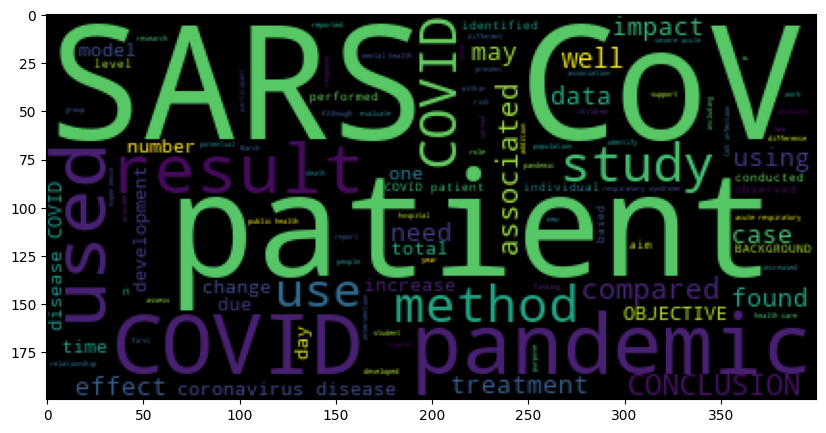

In [32]:
#word cloud visualization for the text
from wordcloud import WordCloud #visualization techniques for #frequently repeated texts
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )

wc.generate(' '.join(token))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.show()

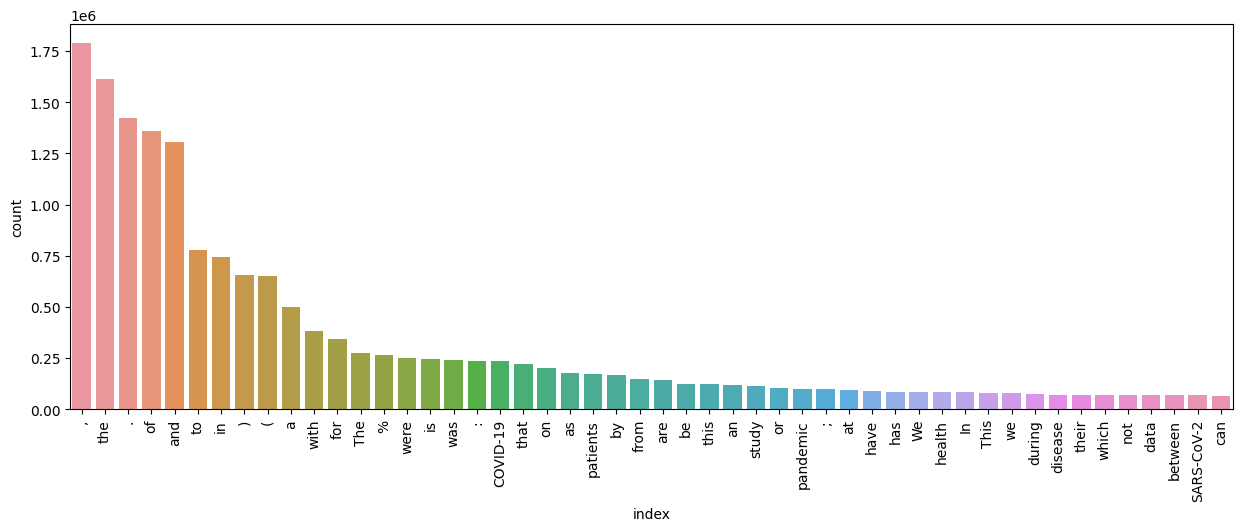

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(data=pd.Series(token).value_counts().reset_index().head(50),x='index',y='count')
plt.xticks(rotation=90)
plt.show()

### data cleaning

In [34]:
import re
import string

def clean_text(input_text):
    # Convert text to lowercase
    cleaned_text = str(input_text).lower()
    print(len(cleaned_text))
    # Remove question marks and periods
    cleaned_text = re.sub(r'[.?]', '', cleaned_text)
    print(len(cleaned_text))
    cleaned_text = cleaned_text.replace('(','').replace(')','').replace('.','').replace('!','')
    print(len(cleaned_text))
    cleaned_text = re.sub(r"\s+", " ", cleaned_text)
    print(len(cleaned_text))
    cleaned_text = re.sub(r'\w*\d\w*', '', cleaned_text)
    print(len(cleaned_text))
    # Remove punctuation marks
    cleaned_text = re.sub(f"[{re.escape(string.punctuation)}]", "", cleaned_text)
    print(len(cleaned_text))
    
    return cleaned_text

### data quality +tokenization

In [35]:
token_clean=clean_text(' '.join(token))

250106625
248202622
246892918
244153904
239123992
234968303


In [36]:
token_clean = [t for t in token_clean.split() if len(t) > 3]  # Remove short tokens
token_clean =word_tokenize(' '.join(token_clean))

In [37]:
print(len(token_clean))

22787526


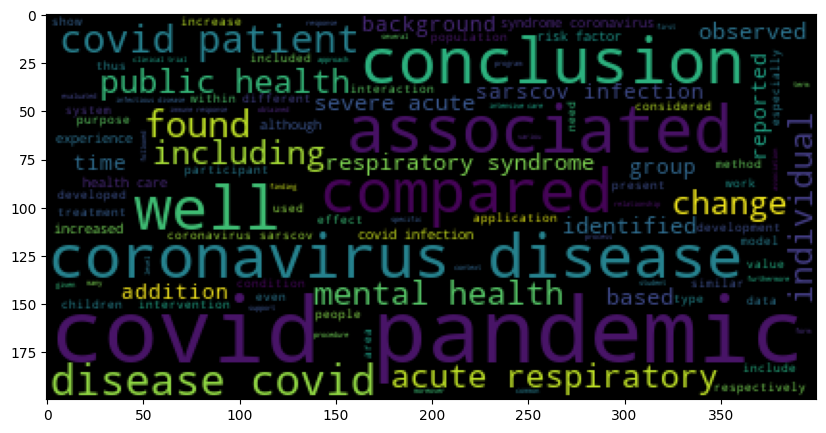

In [38]:
wc.generate(' '.join(token_clean))
plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.show()

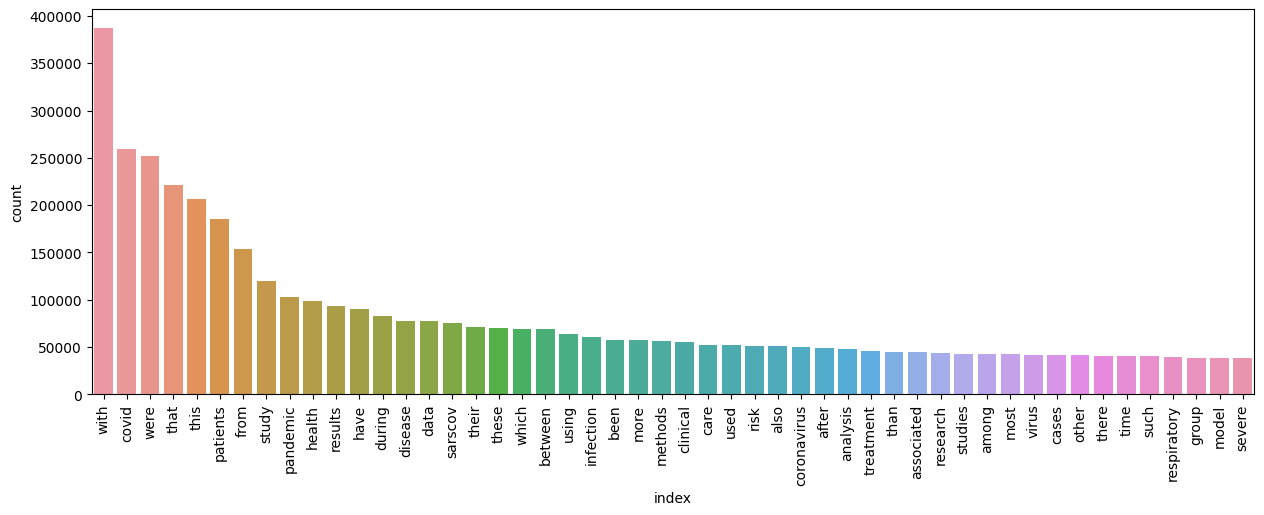

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(data=pd.Series(token_clean).value_counts().reset_index().head(50),x='index',y='count')
plt.xticks(rotation=90)
plt.show()

### Stop-word removal

In [40]:
import pandas as pd

stopwords = nltk.corpus.stopwords.words('english')


In [41]:
texts = [t for t in token_clean if t.lower() not in stopwords]

C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


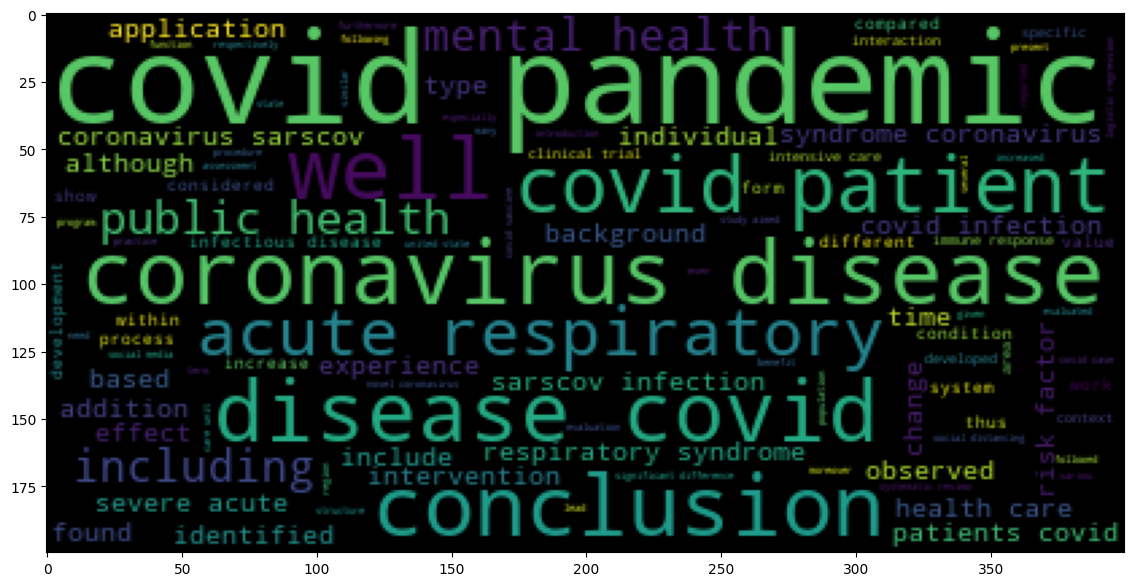

In [42]:
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )
wc.generate(' '.join(texts))
plt.figure(figsize=(20,7))
plt.imshow(wc)
plt.show()

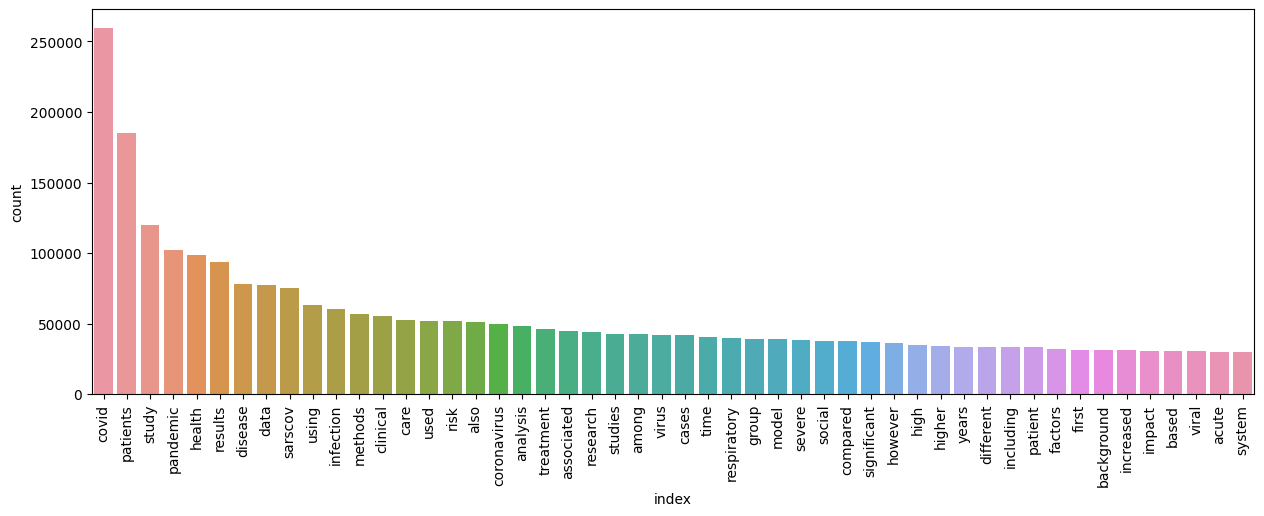

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(data=pd.Series(texts).value_counts().reset_index().head(50),x='index',y='count')
plt.xticks(rotation=90)
plt.show()

### Stemming 

In [44]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_tokens = [stemmer.stem(token) for token in texts]

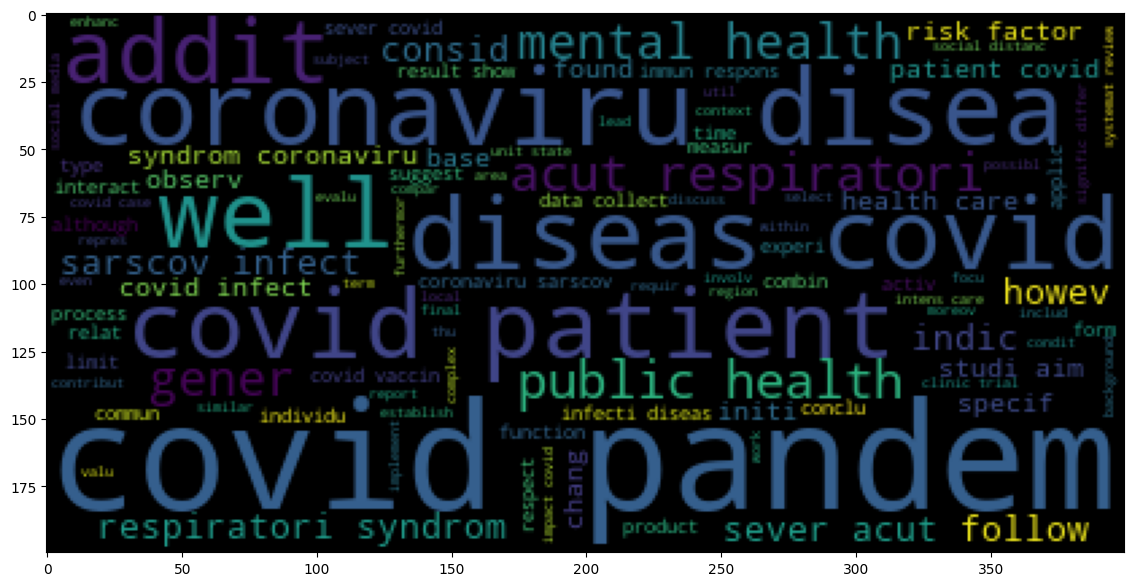

In [45]:
wc.generate(' '.join(stemmed_tokens))
plt.figure(figsize=(20,7))
plt.imshow(wc)
plt.show()

* Tokenization: Tokenization involves breaking down a text into individual words or tokens. Tokenization allows us to analyze and process text at a more granular level, enabling tasks like counting word frequencies or building language models.

* By stopwords removal i was able to  reduce noise in the data and improve the efficiency of the following nlp analysis.

* Stemming: returned words that does not exist . By consolidating similiar words the reduction return words that does not exist. There results after applying stemming can affect the topic modeling since linguistic accuracy and interpretability are important for topic modeling task, this why I  consider using lemmatization instead of stemming. 

### Lemmatization 

In [46]:
from nltk.stem import WordNetLemmatizer
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
lemmatize_text=lemmatize_text(' '.join(texts))

C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


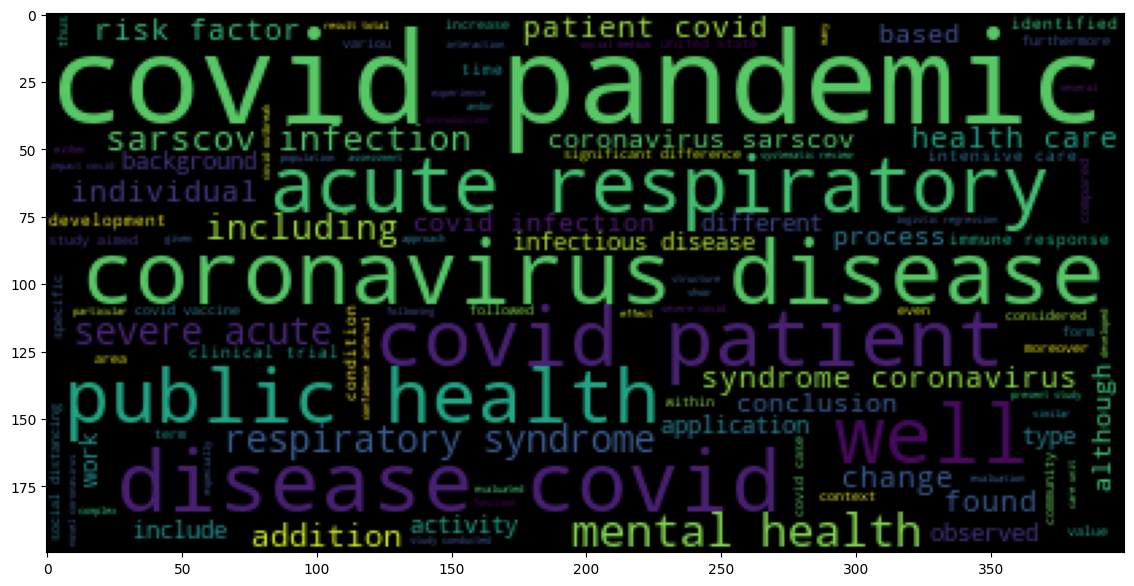

In [47]:
wc = WordCloud(
    background_color='black',
    max_words = 100,
    random_state = 42,
    max_font_size=110
    )
wc.generate(lemmatize_text)
plt.figure(figsize=(20,7))
plt.imshow(wc)
plt.show()

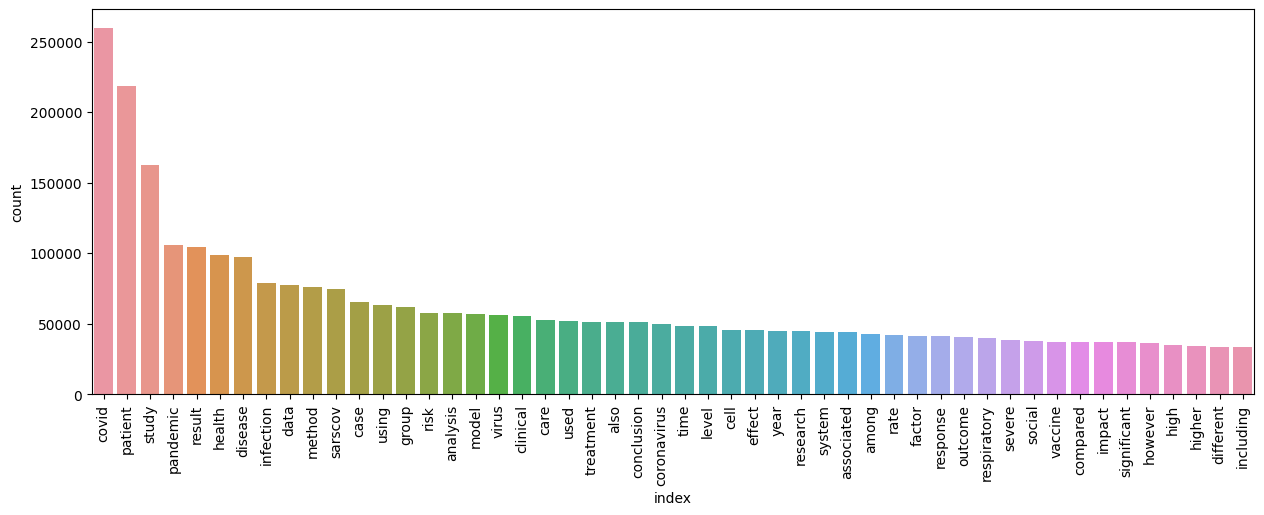

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(data=pd.Series(lemmatize_text.split()).value_counts().reset_index().head(50),x='index',y='count')
plt.xticks(rotation=90)
plt.show()

## Selecting appropriate text mining techniques to extract insights from the CORD-19 dataset. 

<div class="alert alert-block alert-warning">
<p style='text-align:center' >  There are some technique can be applied to this dataset but by choosing what is the purpose of the analysis we can implement the "appropriate" text mining technique, since depeding of the purpose of analysis the techniques can offer better insights:  
    
I would like to state what would be the scope of each feasible techinique for this dataset by comparing them :  
    * **"Keyword Extraction"**: I could identify the most relevant keywords from the text to understand tha main topics, as I did it previously in the words clouds.  
    * **"Topic Modeling"**: I could discover abstract topics with a collection of text. By using AI with topic modeling, I can help identify the main topics in the COVID 19 dataset.One of these methods is LDA, it  dicover the hidden connections in a set of words by looking at the relationships between words in a document and grouping them into topics.    
    * **"Sentiment Analysis"**: This would be helpful to understand the overall sentimental of articles in the dataset, such as positive, negative, or neutral sentiment.  
    * **"Named Entity Recognition (NER)"**: I could identify the entities in text such as organizations, locations, symptoms and medical terms.  
    

<div class="alert alert-block alert-info">
<p style='text-align:center' >  Given the range of available techniques, I would opt for topic modeling as my preferred approach. The reason is that there is a vast array of articles on COVID-19, and performing keyword extraction, sentiment analysis, or named entity recognition could lead to ambiguous results. Instead, it would be more beneficial to categorize and separate the data, enabling us to extract more meaningful words, ideas, and insights. By analyzing the dataset in this manner, we can gain a deeper understanding of the subject matter.
    



#### Topic Modeling

In [52]:
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [53]:


def clean_text1(input_text):
    # Convert input text to lowercase
    cleaned_text = str(input_text).lower()
    
    # remove punctuation marks
    cleaned_text = re.sub(f"[{re.escape(string.punctuation)}]", "", cleaned_text)
    # remove numbers and words with numbers
    cleaned_text = re.sub(r'\w*\d\w*', '', cleaned_text)
    # remove words with less than 4 letters
    cleaned_text = ' '.join(word for word in cleaned_text.split() if len(word) > 3)
    # tokenize the text
    tokens = word_tokenize(cleaned_text)
    # remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # join the tokens back into a cleaned text
    cleaned_text = ' '.join(tokens)
    
    cleaned_text = cleaned_text.encode("ascii", "ignore").decode("ascii")
    return cleaned_text

In [55]:
documents=df_abstract.abstract

In [56]:
pd.Series(documents)

0         Objective: Healthcare workers (HWs) perform a ...
1         Ever since it was first reported in Wuhan, Chi...
2         The 2019 novel coronavirus disease (COVID-19) ...
3         In this interview to commemorate the 30th anni...
4                                                          
                                ...                        
203473    The use of stapling devices to manage vascular...
203474    BACKGROUND: Viral pathogens have not generally...
203475    The susceptibility and the severity of coronav...
203476    The present work aimed to study the activity o...
203477    OBJECTIVE To study the expression of the immun...
Name: abstract, Length: 203478, dtype: object

In [57]:
documents_cleaned=pd.Series(documents).apply(clean_text1)
documents_cleaned

0         objective healthcare worker perform critical r...
1         ever since first reported wuhan china coronavi...
2         novel coronavirus disease pandemic represents ...
3         interview commemorate anniversary theory cultu...
4                                                          
                                ...                        
203473    stapling device manage vascular pedicle hepati...
203474    background viral pathogen generally regarded i...
203475    susceptibility severity coronavirus disease ca...
203476    present work aimed study activity naturally de...
203477    objective study expression immune cell marker ...
Name: abstract, Length: 203478, dtype: object

In [58]:
documents_cleaned = documents_cleaned.tolist()
texts = [
    [word for word in document.lower().split()]
    for document in documents_cleaned
]

In [59]:
# create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[1][:10]

[(2, 1),
 (38, 2),
 (56, 1),
 (66, 1),
 (67, 1),
 (72, 2),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 3)]

In [60]:
# create the Tfidf model
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [61]:
# create LDA model
lda_model = gensim.models.LdaMulticore(corpus_tfidf,
                                       num_topics=4,
                                       id2word = dictionary,
                                       passes = 16,
                                       workers=8,random_state=40)

In [62]:
top_topics = lda_model.top_topics(corpus_tfidf)
num_topics = 4
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
#avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
#print('Average topic coherence: %.4f.' % avg_topic_coherence)


In [63]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))
# a measure of how good the model is. lower the better.


Perplexity:  -10.120604933007877


In [64]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.185273 -0.016054       1        1  51.578435
3     -0.063852  0.104550       2        1  24.490421
0      0.011875 -0.109583       3        1  19.233172
2      0.237250  0.021086       4        1   4.697973, topic_info=          Term         Freq        Total Category  logprob  loglift
56     patient  3139.000000  3139.000000  Default  30.0000  30.0000
1002      cell  1179.000000  1179.000000  Default  29.0000  29.0000
354    protein   898.000000   898.000000  Default  28.0000  28.0000
201      virus  1389.000000  1389.000000  Default  27.0000  27.0000
439      viral   902.000000   902.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
13305   estado     9.587899    10.196588   Topic4  -8.6273   2.9965
3601     cette     9.467420    10.068469   Topic4  -8.6399   2.9965
13545  pandmie     9.402524    10.003553   Topic4  -8.6468   2.9961
5089   unknown    19.940968   212.488811   Topic4  -7.8950   0.6919
3672      plus    10.778167    95.831187   Topic4  -8.5103   0.8730

[287 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2032      2  0.993691  abdominal
3092      2  0.146697       acid
3092      3  0.852092       acid
86        1  0.147642      acute
86        2  0.639395      acute
...     ...       ...        ...
81        2  0.027909     worker
81        3  0.001744     worker
267       1  0.572194       year
267       2  0.400113       year
267       3  0.027448       year

[468 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

This is a good example how we can get different insights by extracting topics that does not overlap from a big corpus. Further analysis by creating more than 3 topics is being done the task number 4.

* Advantages:

    * AI and NLP techniques can process large amounts of text data fast, so researchers can analyze many scholarly articles in a short time.

    * These techniques help researchers extract important insights and patterns from the data. They can discover significant findings, trends, and connections between different ideas.

    * AI and NLP can automate the text analysis process, reducing the need for manual work. They can also handle large datasets, making it easier to analyze a lot of information.

* Challenges:

    * The CORD-19 dataset contains articles of varying quality and consistency. Sometimes, there is irrelevant or misleading information, which can affect the accuracy of the analysis.

    * The CORD-19 dataset focuses on medical and scientific research, which introduces specific difficulties. The language used can be complex, and understanding the results requires specialized knowledge.

    * AI and NLP techniques may struggle to fully understand the context and subtle meanings in the text. This can lead to misinterpretations or incorrect conclusions. Human experts are often needed to validate and interpret the results.

## Addressing the research goal of identifying risk factors of COVID-19. Formulating of relevant queries or search criteria to extract information related to risk factors.

It has being executed previous queries to achieve the articles related to risk factors.

In [61]:
tables[tables['Table Header']=='Risk Factors']

Table Name  Table Header  Table Format  \
47                          Hypertension  Risk Factors             8   
48                              Diabetes  Risk Factors             8   
49                           Male gender  Risk Factors             8   
50                         Heart Disease  Risk Factors             8   
51                                  COPD  Risk Factors             8   
52                        Smoking Status  Risk Factors             8   
53                                   Age  Risk Factors             8   
54               Cerebrovascular disease  Risk Factors             8   
55   Cardio- and cerebrovascular disease  Risk Factors             8   
56                                Cancer  Risk Factors             8   
57           Respiratory system diseases  Risk Factors             8   
58                Chronic kidney disease  Risk Factors             8   
59          Chronic respiratory diseases  Risk Factors             8   
60                              Drinking  Risk Factors             8   
61                   Overweight or obese  Risk Factors             8   
62                 Chronic liver disease  Risk Factors             8   
63                         Heart Failure  Risk Factors             8   
64               Immune system disorders  Risk Factors             8   
65                                Asthma  Risk Factors             8   
66                              Dementia  Risk Factors             8   
67                    Endocrine diseases  Risk Factors             8   
68  Ethnicity: Hispanic vs. non-Hispanic  Risk Factors             8   
69                 Race: Black vs. White  Risk Factors             8   
70                 Race: Asian vs. White  Risk Factors             8   
71                 Race: Other vs. White  Risk Factors             8   
72           Chronic digestive disorders  Risk Factors             8   
73                  Autoimmune disorders  Risk Factors             8   
74                Neurological disorders  Risk Factors             8   

    Table Order                                 File Name       Curator  
47           48                          Hypertension.csv  Savanna Reid  
48           49                              Diabetes.csv  Savanna Reid  
49           50                           Male gender.csv  Savanna Reid  
50           51                         Heart Disease.csv  Savanna Reid  
51           52                                  COPD.csv  Savanna Reid  
52           53                        Smoking Status.csv  Savanna Reid  
53           54                                   Age.csv  Savanna Reid  
54           55               Cerebrovascular disease.csv  Savanna Reid  
55           56   Cardio- and cerebrovascular disease.csv  Savanna Reid  
56           57                                Cancer.csv  Savanna Reid  
57           58           Respiratory system diseases.csv  Savanna Reid  
58           59                Chronic kidney disease.csv  Savanna Reid  
59           60          Chronic respiratory diseases.csv  Savanna Reid  
60           61                              Drinking.csv  Savanna Reid  
61           62                   Overweight or obese.csv  Savanna Reid  
62           63                 Chronic liver disease.csv  Savanna Reid  
63           64                         Heart Failure.csv  Savanna Reid  
64           65               Immune system disorders.csv  Savanna Reid  
65           66                                Asthma.csv  Savanna Reid  
66           67                              Dementia.csv  Savanna Reid  
67           68                    Endocrine diseases.csv  Savanna Reid  
68           69  Ethnicity_ Hispanic vs. non-Hispanic.csv  Savanna Reid  
69           70                 Race_ Black vs. White.csv  Savanna Reid  
70           71                 Race_ Asian vs. White.csv  Savanna Reid  
71           72                 Race_ Other vs. White.csv  Savanna Reid  
72           73  

In [228]:
# all articles extracted in the format risk factors

In [230]:
dict_formats['8_risk_factors'].head()

Date                                              Study  \
0  2020-05-29  Phenotypic characteristics and prognosis of in...   
1  2020-05-28          Obesity and COVID-19: an Italian snapshot   
2  2020-05-26  Association between Cardiovascular Burden and ...   
3  2020-05-26  Association between Cardiovascular Burden and ...   
4  2020-05-26  Association between Cardiovascular Burden and ...   

                                          Study Link       Journal  \
0      https://www.ncbi.nlm.nih.gov/pubmed/32472191/  Diabetologia   
1      https://www.ncbi.nlm.nih.gov/pubmed/32463545/       Obesity   
2  http://medrxiv.org/cgi/content/short/2020.05.2...       MedRxiv   
3  http://medrxiv.org/cgi/content/short/2020.05.2...       MedRxiv   
4  http://medrxiv.org/cgi/content/short/2020.05.2...       MedRxiv   

                             Multivariate adjustment  \
0                                                NaN   
1                                                NaN   
2                                           Age; Sex   
3  Age; Sex; Chest tightness; Diabetes; Lung dise...   
4  Age; Sex; Chest tightness; Diabetes; Lung dise...   

                          Study Type Sample Size  \
0  Retrospective observational study        1317   
1  Retrospective observational study          92   
2  Retrospective observational study         332   
3  Retrospective observational study         332   
4  Retrospective observational study         332   

                                    Study Population Added on  
0  The CORONADO study was launched in all French ...      NaN  
1  92 patients stayed at least one day in the COV...      NaN  
2  February 5, 2020, to March 10, 2020 (followed ...      NaN  
3  February 5, 2020, to March 10, 2020 (followed ...      NaN  
4  February 5, 2020, to March 10, 2020 (followed ...      NaN

As the same articles are being references more than 1 time in the same format "8_risk_factors" from different sources. I am remove the duplicated article to prevent analizing more than 1 time the same abstract 

In [62]:
metadata[metadata.title=='Phenotypic characteristics and prognosis of inpatients with COVID-19 and diabetes: the CORONADO study']

cord_uid                                                sha  \
555148  06x0cei2                                                NaN   
555149  06x0cei2                                                NaN   
984966  97j1gt5k  3e723852a2b7be49f3f3c9b0ad6cb0eab04f9a36; 6b64...   

            source_x                                              title  \
555148           WHO  Phenotypic characteristics and prognosis of in...   
555149           WHO  Phenotypic characteristics and prognosis of in...   
984966  Medline; PMC  Phenotypic characteristics and prognosis of in...   

                               doi       pmcid   pubmed_id license  \
555148                         NaN         NaN         NaN     unk   
555149                         NaN         NaN         NaN     unk   
984966  10.1007/s00125-020-05180-x  PMC7256180  32472191.0   cc-by   

                                                 abstract publish_time  \
555148  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...         2020   
555149  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...         2020   
984966  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...   2020-05-29   

                                                  authors       journal  \
555148  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...  Diabetologia   
555149  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...  Diabetologia   
984966  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...  Diabetologia   

        mag_id who_covidence_id arxiv_id  \
555148     NaN          #422785      NaN   
555149     NaN        #32472191      NaN   
984966     NaN              NaN      NaN   

                                           pdf_json_files  \
555148                                                NaN   
555149                                                NaN   
984966  document_parses/pdf_json/3e723852a2b7be49f3f3c...   

                                      pmc_json_files  \
555148                                           NaN   
555149                                           NaN   
984966  document_parses/pmc_json/PMC7256180.xml.json   

                                                      url        s2_id  
555148                                                NaN  218977920.0  
555149                                                NaN  218977920.0  
984966  https://www.ncbi.nlm.nih.gov/pubmed/32472191/;...  218977920.0

In [234]:
df_meta_unique=metadata.drop_duplicates(subset='s2_id',keep='last')
df_meta_unique.shape

(678263, 19)

In [235]:
df_meta_unique[df_meta_unique.title=='Phenotypic characteristics and prognosis of inpatients with COVID-19 and diabetes: the CORONADO study']

cord_uid                                                sha  \
984966  97j1gt5k  3e723852a2b7be49f3f3c9b0ad6cb0eab04f9a36; 6b64...   

            source_x                                              title  \
984966  Medline; PMC  Phenotypic characteristics and prognosis of in...   

                               doi       pmcid   pubmed_id license  \
984966  10.1007/s00125-020-05180-x  PMC7256180  32472191.0   cc-by   

                                                 abstract publish_time  \
984966  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...   2020-05-29   

                                                  authors       journal  \
984966  Cariou, Bertrand; Hadjadj, Samy; Wargny, Matth...  Diabetologia   

        mag_id who_covidence_id arxiv_id  \
984966     NaN              NaN      NaN   

                                           pdf_json_files  \
984966  document_parses/pdf_json/3e723852a2b7be49f3f3c...   

                                      pmc_json_files  \
984966  document_parses/pmc_json/PMC7256180.xml.json   

                                                      url        s2_id  
984966  https://www.ncbi.nlm.nih.gov/pubmed/32472191/;...  218977920.0

The column to identify duplicate is s2_id

In [236]:
df_abstract=df_meta_unique[['title','abstract']]

In [237]:
df_abstract.shape

(678263, 2)

In [238]:
met_merged=pd.merge(left=df_abstract,right=dict_formats['8_risk_factors'],left_on='title',right_on='Study',how='right')
met_merged.drop_duplicates(subset='title',inplace=True)
met_merged=met_merged.reset_index(drop=True)

In [239]:
met_merged[met_merged.title=='Phenotypic characteristics and prognosis of inpatients with COVID-19 and diabetes: the CORONADO study']

title  \
0  Phenotypic characteristics and prognosis of in...   

                                            abstract        Date  \
0  AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...  2020-05-29   

                                               Study  \
0  Phenotypic characteristics and prognosis of in...   

                                      Study Link       Journal  \
0  https://www.ncbi.nlm.nih.gov/pubmed/32472191/  Diabetologia   

  Multivariate adjustment                         Study Type Sample Size  \
0                     NaN  Retrospective observational study        1317   

                                    Study Population Added on  
0  The CORONADO study was launched in all French ...      NaN

In [240]:
met_merged.shape

(166, 11)

In [241]:
# before the qualilty work
met_merged.abstract

0      AIMS/HYPOTHESIS: Coronavirus disease-2019 (COV...
1                                                    NaN
2      BACKGROUND: Information regarding the impact o...
3      PURPOSE: There have been nearly 200,000 deaths...
4      Coronavirus disease 2019 (COVID-19) is a pande...
                             ...                        
161    Background: Coronavirus disease 2019 (COVID-19...
162                                                  NaN
163                                                  NaN
164    BackgroundCoronavirus disease 2019 (COVID-19) ...
165    Abstract Background: A new virus broke out in ...
Name: abstract, Length: 166, dtype: object

In [242]:
# after working on the quality
documents_cleaned=met_merged.abstract.apply(clean_text1)
documents_cleaned

0      aimshypothesis coronavirus lifethreatening inf...
1                                                       
2      background information regarding impact cardio...
3      purpose nearly death worldwide cancer history ...
4      coronavirus disease pandemic specific drug hig...
                             ...                        
161    background coronavirus disease evolving infect...
162                                                     
163                                                     
164    backgroundcoronavirus disease triggered infect...
165    abstract background virus broke wuhan hubei ch...
Name: abstract, Length: 166, dtype: object

## Applying text mining tools to analyze the articles and identify potential risk factors associated with COVID-19. Proving insights and patterns discovered during the analysis.

In [243]:
documents_cleaned = documents_cleaned.tolist()
texts = [
    [word for word in document.lower().split()]
    for document in documents_cleaned
]

In [244]:
# create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[2][:10]

[(3, 1),
 (26, 1),
 (52, 1),
 (67, 1),
 (68, 1),
 (71, 1),
 (76, 1),
 (78, 12),
 (89, 1),
 (96, 1)]

In [245]:
# create the Tfidf model
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [262]:
# create LDA model
num_topics=2
lda_model = gensim.models.LdaMulticore(corpus_tfidf,
                                       num_topics=num_topics,
                                       id2word = dictionary,
                                       passes = 16,
                                       workers=8,random_state=70) #15

In [263]:
top_topics = lda_model.top_topics(corpus_tfidf)
top_topics


[([(0.0020342392, 'diabetes'),
   (0.0019163261, 'case'),
   (0.0018000033, 'severe'),
   (0.0017994372, 'group'),
   (0.0017780794, 'mortality'),
   (0.0017474483, 'admission'),
   (0.001744851, 'death'),
   (0.001661736, 'patient'),
   (0.0016372722, 'risk'),
   (0.0016350382, 'disease'),
   (0.001540506, 'cancer'),
   (0.0015348921, 'comorbidities'),
   (0.001470078, 'factor'),
   (0.0014426135, 'severity'),
   (0.0014284799, 'outcome'),
   (0.0014093885, 'hypertension'),
   (0.001385715, 'inhospital'),
   (0.0013781352, 'symptom'),
   (0.0013749836, 'associated'),
   (0.0013612345, 'pneumonia')],
  -1.3474770028911418),
 ([(0.00082895055, 'neurological'),
   (0.0007505885, 'frailty'),
   (0.00068808626, 'black'),
   (0.00059234654, 'arb'),
   (0.000575719, 'raas'),
   (0.00056434347, 'gastrointestinal'),
   (0.0005566013, 'racial'),
   (0.000550008, 'taking'),
   (0.00054689444, 'ethnic'),
   (0.0005357001, 'adjusted'),
   (0.00053380505, 'aceis'),
   (0.00053379656, 'ccbs'),
   (0

In [264]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))
# a measure of how good the model is. lower the better.


Perplexity:  -8.604397049132364


In [265]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.013709  0.0       1        1  91.223499
0     -0.013709  0.0       2        1   8.776501, topic_info=                  Term      Freq     Total Category  logprob  loglift
2126           frailty  0.000000  0.000000  Default  30.0000  30.0000
1608      neurological  0.000000  0.000000  Default  29.0000  29.0000
990              black  0.000000  0.000000  Default  28.0000  28.0000
478                arb  0.000000  0.000000  Default  27.0000  27.0000
2241  gastrointestinal  0.000000  0.000000  Default  26.0000  26.0000
...                ...       ...       ...      ...      ...      ...
294           adjusted  0.054858  0.718152   Topic2  -7.5319  -0.1388
25             control  0.051120  0.614026   Topic2  -7.6025  -0.0528
2078             south  0.049576  0.488596   Topic2  -7.6332   0.1451
300           comorbid  0.048656  0.407685   Topic2  -7.6519   0.3074
1532       interaction  0.048423  0.429592   Topic2  -7.6567   0.2502

[124 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
294       1  1.392463       adjusted
1         1  1.054322      admission
8         1  0.665204     associated
192       1  1.193951         cancer
137       1  0.703974           care
13        1  0.961767           case
387       1  0.757504        chronic
17        1  0.720361       clinical
301       1  1.195103  comorbidities
25        1  1.628596        control
196       1  0.720236       critical
31        1  0.715545            day
32        1  1.054845          death
33        1  0.905759       diabetes
147       1  1.124235        disease
151       1  1.246611         factor
154       1  1.021058          group
156       1  0.725338         higher
157       1  0.720108       hospital
353       1  0.738696   hospitalized
158       1  1.298222   hypertension
444       1  0.717783        illness
356       1  0.661669     inhospital
56        1  0.760195          level
568       1  0.719556           male
218       1  1.033837      mortality
76        1  1.282749        outcome
78        1  1.106978        patient
535       1  0.673480      pneumonia
172       1  0.744003           rate
103       1  1.122026           risk
104       1  1.022715         severe
105       1  1.269937       severity
331       1  0.661269        symptom
291       1  0.754008          wuhan, R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

Within the larger cluster (Topic #1), there are indications of certain risk factors associated with severe COVID-19 illness (comorbidities), including:
* Diabetes
* Cancer
* hypertension

Furthermore, the topic 1 contains related terms that can provide further insight into these illnesses, such as:
* comorbidities
* patient
* death
* mortality
* illness
* desease
* critical


### Risk factors for serious COVID-19 illness

In [75]:
#pip uninstall spacy

In [266]:
corpus_sentences=met_merged.abstract.apply(lambda x:'' if pd.isna(x) else x)

In [267]:
import spacy

# load the language model
nlp = spacy.load('en_core_web_sm')

# preprocess the corpus
corpus = " ".join(corpus_sentences)  
doc = nlp(corpus)

In [268]:
def what_is_mentioned(word):
    # iterate over the entities in the document
    for entity in doc.ents:
        if entity.text.lower() == target_word.lower():
            print(entity.text, entity.label_)
    # iterate over the sentences in the document
    for sentence in doc.sents:
        # iterate over the tokens in the sentence
        for token in sentence:
            if token.text.lower() == target_word.lower():
                # Print the token and its dependency subtree
                #print('')
                print(token.text, [child.text for child in token.subtree]) if len([child.text for child in token.subtree])>4 else None 

##### comorbidities

 Let's see what is being mentioned about the "comorbidities" in these articles focused about risks

In [274]:
target_word = "comorbidities"
what_is_mentioned(target_word)

comorbidities ['the', 'most', 'distinct', 'comorbidities', 'of', 'COVID-19']
comorbidities ['comorbidities', '(', 'e.g.', 'hypertension', ',', 'coronary', 'heart', 'disease', ',', 'chronic', 'renal', 'failure', ',', 'and', 'chronic', 'obstructive', 'pulmonary', 'disease', ')', ',', 'and', 'high', 'level', 'of', 'C', '-', 'reactive', 'protein']
comorbidities ['comorbidities', 'associated', 'with', 'mortality', 'in', 'geriatric', 'patients']
comorbidities ['pre', '-', 'existing', 'comorbidities', 'for', 'coronavirus', 'disease', '2019', '(', 'COVID-19', ')', ',', 'which', 'has', 'important', 'implications', 'for', 'early', 'treatment']
comorbidities ['pre', '-', 'existing', 'comorbidities', 'on', 'COVID-19', 'mortality']
comorbidities ['pre', '-', 'existing', 'comorbidities', ',', 'especially', 'CHD']
comorbidities ['chronic', 'comorbidities', ',', 'demographic', 'data', ',', 'and', 'laboratory', 'and', 'radiological', 'data']
comorbidities ['≥]4', 'comorbidities', 'versus', 'no', 'comor

##### Risk

 Let's see what is being mentioned about the "Risk" in these articles focused about risks

In [278]:
target_word = "Risk"
what_is_mentioned(target_word)

risk ['the', 'risk', 'of', 'death', 'on', 'day', '7']
risk ['14', '-', 'day', 'mortality', 'risk']
risk ['the', 'death', 'risk', 'of', 'critically', 'ill', 'COVID-19', 'patients']
risk ['greater', 'risk', 'of', 'dying', 'during', 'hospitalization']
risk ['risk', 'of', 'in', '-', 'hospital', 'death', ',', 'hazard', 'ratio', '(', 'HR', ')']
risk ['The', 'risk', 'of', 'in', '-', 'hospital', 'death', 'among', 'patients', 'with', 'severe', 'COVID-19']
risk ['a', 'potential', 'increased', 'risk', 'of', 'worse', 'clinical', 'outcomes', 'and']
risk ['risk', 'and', 'severity', 'of', 'COVID', '19']
risk ['significantly', 'lower', 'disease', 'risk', '(', 'OR=0.24', ';', '95%CI', '0.17', '-', '0.34', 'and', 'OR=0.32', ';']
risk ['increased', 'risk', 'of', 'severe', 'or', 'critical', 'form', 'of', 'the', 'infection']
risk ['higher', 'risk', 'of', 'developing', 'a', 'severe', 'form', 'of', 'COVID-19and']
risk ['the', 'risk', 'of', 'pre', '-', 'existing', 'comorbidities', 'on', 'COVID-19', 'mortality

##### Mortality

 Let's see what is being mentioned about the "Mortality" in these articles focused about risks

In [277]:
target_word = "Mortality"
what_is_mentioned(target_word)

mortality ['higher', 'mortality', 'of', 'patients', 'with', 'diabetes', 'and', 'COVID-19']
mortality ['mortality', 'in', 'older', 'patients', 'with', 'coronavirus', 'disease', '2019', '(', 'COVID‐19', ')']
mortality ['mortality', 'in', 'elderly', 'patients', 'with', 'COVID-19']
mortality ['substantial', 'in', '-', 'hospital', 'mortality']
mortality ['in', '-', 'hospital', 'mortality', 'of', 'patients', 'with', 'confirmed', 'or', 'suspected', 'COVID-19']
mortality ['in', '-', 'hospital', 'mortality', ',', 'and', '4']
mortality ['mortality', 'in', 'patients', 'affected', 'by', 'COVID-19']
mortality ['mortality', 'with', 'ORs', 'ranging', 'from', '1.2', '-', '1.3', '(', 'e.g.', 'ischemic', 'heart', 'disease', ',', 'hypertension', ')']
mortality ['In', '-', 'hospital', 'mortality', 'for', 'COVID-19']
mortality ['the', 'overall', 'mortality', 'of', 'COVID-19']
mortality ['the', 'mortality', 'of', 'elderly', 'patients']
mortality ['mortality', ',', 'or', 'a', 'composite', 'outcome']
mortalit

##### Death

 Let's see what is being mentioned about the "Death" in these articles focused about risks

In [282]:
target_word = "Death"
what_is_mentioned(target_word)

Death PERSON
death ['in', '-', 'hospital', 'death', ',', 'hazard', 'ratio', '(', 'HR', ')']
death ['in', '-', 'hospital', 'death', 'among', 'patients', 'with', 'severe', 'COVID-19']
death ['in', '-', 'hospital', 'death', 'associated', 'with', 'older', 'age', '(', 'odds', 'ratio', '1·10', ',', '95', '%', 'CI', '1·03–1·17', ',', 'per', 'year', 'increase']
death ['death', 'in', 'non', '-', 'survivors']
death ['death', 'of', 'hospital', 'inpatients', 'with', 'confirmed', 'COVID-19']
death ['death', 'from', 'COVID-19', 'uncontrolled', 'diabetes', '(', 'HR', '2.36', '95', '%', 'CI', '2.18', '-', '2.56', ')', ';', 'severe', 'asthma', '(', 'HR', '1.25', 'CI', '1.08', '-', '1.44', ')', ';', 'and', 'various', 'other', 'prior', 'medical', 'conditions']
death ['in', '-', 'hospital', 'death', 'from', 'COVID-19']
death ['in', '-', 'hospital', 'death', 'in', 'Chinese', 'COVID-19', 'patients']
death ['in', '-', 'hospital', 'all', '-', 'cause', 'death']
death ['death', 'of', '50', '%', 'as', 'the', 'cu

##### Disease

 Let's see what is being mentioned about the "Disease" in these articles focused about risks

In [284]:
target_word = "Disease"
what_is_mentioned(target_word)

disease ['Coronavirus', 'disease', '2019', '(', 'COVID-19', ')']
disease ['coronavirus', 'disease', '2019', '(', 'COVID‐19', ')']
disease ['severe', 'coronavirus', 'disease', '2019', '(', 'COVID-19', ')']
disease ['coronary', 'heart', 'disease', ',', 'chronic', 'renal', 'failure', ',', 'and', 'chronic', 'obstructive', 'pulmonary', 'disease']
disease ['chronic', 'lung', 'disease', ',', 'and', 'higher', 'concentrations', 'of', 'interleukin-6', 'and', 'd', '-', 'dimer', 'at', 'admission']
disease ['coronavirus', 'disease', '2019', '(', 'COVID-19', ')', ',']
disease ['severe', 'corona', 'virus', 'disease', '2019', '(', 'COVID-19', ')', 'patients']
disease ['cardiovascular', 'disease', ',', 'and', 'chronic', 'obstructive', 'pulmonary', 'disease']
disease ['severe', 'corona', 'virus', 'disease', '2019', '(', 'COVID-19', ')', 'patients']
disease ['coronavirus', 'disease', '2019', '(', 'Covid-19', ')']
disease ['the', '2019', 'novel', 'coronavirus', 'disease', '(', 'COVID-19', ')']
disease ['c

##### hypertension

 Let's see what is being mentioned about the "hypertension" in these articles focused about risks

In [270]:
target_word = "hypertension"
what_is_mentioned(target_word)

Hypertension ORG
hypertension ['either', 'hypertension', 'or', 'coronary', 'heart', 'disease', '(', 'CHD', ')']
hypertension ['e.g.', 'hypertension', ',', 'coronary', 'heart', 'disease', ',', 'chronic', 'renal', 'failure', ',', 'and', 'chronic', 'obstructive', 'pulmonary', 'disease', ')', ',', 'and', 'high', 'level', 'of', 'C', '-', 'reactive', 'protein']
hypertension ['hypertension', ',', 'chronic', 'lung', 'disease', ',', 'and', 'higher', 'concentrations', 'of', 'interleukin-6', 'and', 'd', '-', 'dimer', 'at', 'admission']
hypertension ['hypertension', ',', 'diabetes', ',', 'cardiovascular', 'disease', ',', 'and', 'chronic', 'obstructive', 'pulmonary', 'disease']
hypertension ['30', '%', 'hypertension', ',', 'and', '21', '%', 'cardiovascular', 'disease']
hypertension ['37', '%', 'hypertension', ',', '24', '%', 'cardiovascular', 'disease', ',', '11', '%', 'chronic', 'kidney', 'disease', ')']
hypertension ['37', '%', 'hypertension', ',', '28', '%', 'cardiovascular', 'disease', ',', '15

##### Cancer

 Let's see what is being mentioned about the "Cancer" in these articles focused about risks

In [272]:
target_word = "Cancer"
what_is_mentioned(target_word)

cancer ['cancer', ',', 'chronic', 'kidney', 'disease', ',', 'chronic', 'liver', 'disease', ',', 'and', 'stroke']
cancer ['cancer', 'and', 'the', 'severity', 'and', 'mortality', 'of', 'patients', 'with', 'COVID-19']
cancer ['the', 'most', 'frequent', 'underlying', 'cancer']
cancer ['prostate', 'cancer', '(', '5/26', ')', ',', 'and']
cancer ['lung', 'cancer', '(', '24', '[', '12', '%', ']', ')']
cancer ['cancer', 'and', 'COVID-19', 'who', 'were', 'admitted', 'to', 'hospital']


# Research Questions and Key Topics

The topics were already explored in the in EDA

## Choosing specific research questions that are suitable for text mining and analysis. Explaining my selection process and the significance of the chosen topics.

I have chosen research questions that pertain to understanding the transmission of COVID-19.

In [73]:
tables[tables['Table Format']==2]['Table Name'].to_list()

['Effectiveness of case isolation/isolation of exposed individuals to prevent secondary transmission',
 'Effectiveness of community contact reduction (i.e. limiting social gatherings, "social distancing")  to prevent secondary transmission in health care and community settings',
 'Effectiveness of inter/inner travel restriction (i.e. lockdown) to prevent secondary transmission in health care and community settings',
 'Effectiveness of school distancing to prevent secondary transmission in health care and community settings',
 'Effectiveness of workplace distancing to prevent secondary transmission',
 'Effectiveness of a multifactorial strategy to prevent secondary transmission',
 'What is the likelihood of significant changes in transmissibility in changing seasons?',
 'Seasonality of transmission ',
 'How does temperature and humidity affect the transmission of 2019-nCoV?',
 'Methods to understand and regulate the spread in communities',
 'Evidence that domesticated/farm animals can b

In [83]:
relevant_unique=dict_formats['2_relevant_factors'].drop_duplicates(subset='Study',keep='last')

In [87]:
met_merged2=pd.merge(left=df_abstract,right=relevant_unique,left_on='title',right_on='Study',how='inner')
met_merged2.shape

(53, 17)

In [135]:
from nltk.tokenize import word_tokenize
clean=met_merged2.abstract.apply(clean_text1)
clean=clean.apply(lambda x: str(x).replace('case','').replace('model','').replace('number',''))
token=word_tokenize(' '.join(clean))

C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


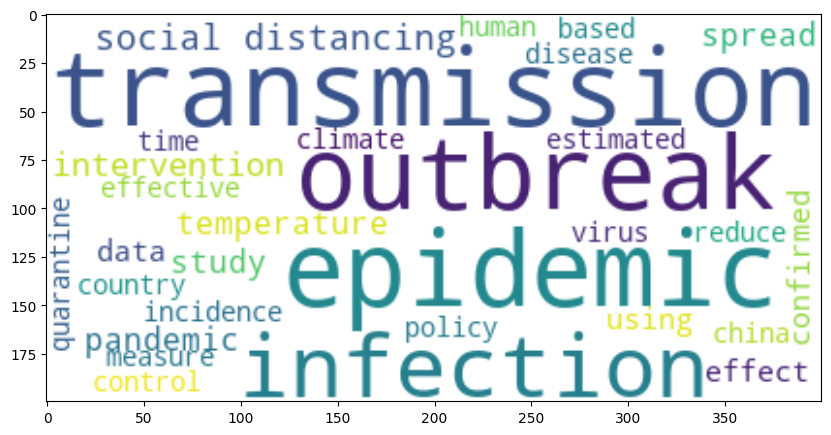

In [141]:
#word cloud visualization for the text
from wordcloud import WordCloud #visualization techniques for #frequently repeated texts
wc = WordCloud(
    background_color='white',
    max_words = 30,
    random_state = 1,
    max_font_size=110
    )

wc.generate(' '.join(token))
plt.figure(figsize=(10,7))
plt.imshow(wc,interpolation='bilinear')
plt.show()

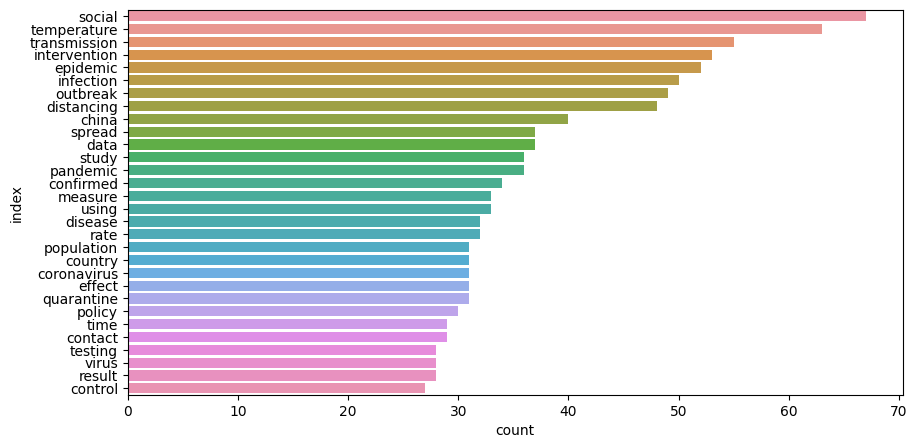

In [143]:
plt.figure(figsize=(10,5))
sns.barplot(data=pd.Series(token).value_counts().reset_index().head(30),y='index',x='count')
plt.show()

Social and  distancing are the words more important in the group of article that answer the question " How to prevent the spread of COVID 19?". We can confirm this by looking at the word cloud and the frecuency of words by this Keyword extraction technique

## Developing models or algorithms that can aid in the identification of topics from the CORD-19 dataset.

In [148]:
texts = [
    [word for word in document.lower().split()]
    for document in documents_cleaned
]

In [153]:
# create dictionary and corpus
dictionary = corpora.Dictionary(texts)
# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in texts]
corpus[1][:10]

[(2, 1),
 (38, 2),
 (56, 1),
 (66, 1),
 (67, 1),
 (72, 2),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 3)]

In [154]:
# create the Tfidf model
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [155]:
# create LDA model
num_topics = 20
lda_model = gensim.models.LdaMulticore(corpus_tfidf,chunksize=200,
                                       num_topics=num_topics,
                                       id2word = dictionary,
                                       passes = 16,
                                       workers=8,random_state=40)

In [156]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus_tfidf, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.344598 -0.092324       1        1  28.871884
16     0.333648 -0.021000       2        1  19.211360
19     0.317813 -0.027148       3        1  14.011543
1      0.267237  0.028742       4        1   7.859781
9      0.061500  0.047395       5        1   3.159508
8      0.045401  0.001833       6        1   2.796944
10     0.037236  0.096718       7        1   2.704932
6     -0.084320  0.236247       8        1   2.545066
18    -0.033187  0.208841       9        1   2.267303
13    -0.053106 -0.156147      10        1   2.004837
5     -0.088333  0.181644      11        1   1.767014
15    -0.134919  0.092395      12        1   1.640238
11    -0.095871 -0.026471      13        1   1.573703
4     -0.111834  0.039398      14        1   1.547108
14    -0.144358 -0.059626      15        1   1.497746
0     -0.125637 -0.168141      16        1   1.387806
12    -0.127583 -0.016074      17        1   1.358352
2     -0.125525 -0.092385      18        1   1.353629
7     -0.141523 -0.148604      19        1   1.297240
17    -0.141239 -0.125292      20        1   1.144004, topic_info=             Term         Freq        Total Category  logprob  loglift
2086      student  1835.000000  1835.000000  Default  30.0000  30.0000
194       vaccine  2056.000000  2056.000000  Default  29.0000  29.0000
626      learning  1428.000000  1428.000000  Default  28.0000  28.0000
56        patient  4380.000000  4380.000000  Default  27.0000  27.0000
659      antibody  1299.000000  1299.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
4622  positioning    75.725433   116.245880  Topic20  -5.1480   4.0420
5827     assembly    80.804588   150.085091  Topic20  -5.0831   3.8515
4051   microscopy    76.456918   182.480787  Topic20  -5.1384   3.6007
2056   derivative    66.884024   186.552227  Topic20  -5.2722   3.4449
3933  degradation    64.521775   160.204940  Topic20  -5.3082   3.5612

[1310 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
6318       5  0.965924     abbott
3526       3  0.056869   ablation
3526       6  0.888583   ablation
3526       7  0.042652   ablation
3605      13  0.991490   abridged
...      ...       ...        ...
4842       9  0.074636      youth
10673     20  0.958759  zebrafish
8684       4  0.022561       zinc
8684       5  0.891167       zinc
8684      15  0.067684       zinc

[3249 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 17, 20, 2, 10, 9, 11, 7, 19, 14, 6, 16, 12, 5, 15, 1, 13, 3, 8, 18])

## Evaluating the performance of your models using appropriate metrics. Discussing the accuracy and reliability of the topics identified.

The measure that I am going perform after executing lda model are:

Coherence Score: Coherence measures the semantic similarity between the top words in a topic. 

Perplexity: Perplexity is a measure of how well a language model predicts a sample. Lower perplexity values indicate better model performance. 

Topic Diversity: Topic diversity measures the extent to which topics cover distinct aspects of the dataset. Higher diversity indicates a broader coverage of topics and less overlap between them.

Topic Interpretability: This metric assesses how easily interpretable the topics are based on their top words. Human evaluation or user studies can be conducted to measure the interpretability of topics.

In [159]:
top_topics = lda_model.top_topics(corpus_tfidf)
# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -6.1138.


In [160]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_tfidf))
# a measure of how good the model is. lower the better.


Perplexity:  -12.156689167261508


In [205]:
def get_document_topic_table(lda_model, corpus, texts):
    topic_df = pd.DataFrame()

    # Get main topic in each document
    for i, topic_list in enumerate(lda_model[corpus]):
        sorted_topics = sorted(topic_list, key=lambda x: (x[1]), reverse=True)
        main_topic_num = sorted_topics[0][0]
        prop_main_topic = sorted_topics[0][1]
        topic_keywords = ", ".join([word for word, _ in lda_model.show_topic(main_topic_num)])
        
        topic_df.at[i, 'main_topic_num'] = main_topic_num
        topic_df.at[i, 'prop_main_topic'] = prop_main_topic
        topic_df.at[i, 'topic_keywords'] = topic_keywords
        topic_df.at[i, 'document_num'] = i

    return topic_df

topic_df = get_document_topic_table(lda_model=lda_model, corpus=corpus, texts=texts)

In [228]:
topic_df=pd.concat([topic_df,df_abstract.title],axis=1)
topic_df=pd.concat([topic_df,df_abstract.abstract],axis=1)
topic_df

main_topic_num  prop_main_topic  \
0                  3.0         0.655984   
1                 19.0         0.634450   
2                 16.0         0.345874   
3                  3.0         0.728647   
4                  0.0         0.050000   
...                ...              ...   
203473            16.0         0.369619   
203474            16.0         0.657081   
203475            16.0         0.499208   
203476            19.0         0.581069   
203477            19.0         0.562549   

                                           topic_keywords  document_num  \
0       pandemic, health, research, model, country, so...           0.0   
1       cell, virus, protein, viral, drug, infection, ...           1.0   
2       patient, case, group, infection, mortality, di...           2.0   
3       pandemic, health, research, model, country, so...           3.0   
4       cat, dog, macrophage, ifn, dengue, pig, hepati...           4.0   
...                                                   ...           ...   
203473  patient, case, group, infection, mortality, di...      203473.0   
203474  patient, case, group, infection, mortality, di...      203474.0   
203475  patient, case, group, infection, mortality, di...      203475.0   
203476  cell, virus, protein, viral, drug, infection, ...      203476.0   
203477  cell, virus, protein, viral, drug, infection, ...      203477.0   

                                                    title  \
0       Healthcare Workers Awareness And Knowledge of ...   
1       A Peek into Pandora’s Box: COVID-19 and Neurod...   
2       Infection or autoimmunity? The clinical challe...   
3       Whither Globalization? An Interview with Rolan...   
4       Effect of COVID-19 on ocular diseases and opht...   
...                                                   ...   
203473  Application of a Penrose drain guide for vascu...   
203474  Viral Infection Is Not Uncommon in Adult Patie...   
203475  Cardiac and Renal SARS-CoV-2 Viral Entry Prote...   
203476  Genetic and Histopathological Alterations in C...   
203477  [Expression of immune cells and their roles in...   

                                                 abstract  
0       Objective: Healthcare workers (HWs) perform a ...  
1       Ever since it was first reported in Wuhan, Chi...  
2       The 2019 novel coronavirus disease (COVID-19) ...  
3       In this interview to commemorate the 30th anni...  
4                                                          
...                                                   ...  
203473  The use of stapling devices to manage vascular...  
203474  BACKGROUND: Viral pathogens have not generally...  
203475  The susceptibility and the severity of coronav...  
203476  The present work aimed to study the activity o...  
203477  OBJECTIVE To study the expression of the immun...  

[203478 rows x 6 columns]

In [296]:
topic_df[(topic_df.main_topic_num==0)&(topic_df.prop_main_topic>0.3)]#.topic_keywords.values[0]

main_topic_num  prop_main_topic  \
6572               0.0         0.524991   
10391              0.0         0.524982   
13884              0.0         0.524991   
25489              0.0         0.524981   
30098              0.0         0.524991   
...                ...              ...   
186346             0.0         0.524982   
186763             0.0         0.524982   
197551             0.0         0.524991   
199065             0.0         0.524981   
203142             0.0         0.524991   

                                           topic_keywords  document_num  \
6572    cat, dog, macrophage, ifn, dengue, pig, hepati...        6572.0   
10391   cat, dog, macrophage, ifn, dengue, pig, hepati...       10391.0   
13884   cat, dog, macrophage, ifn, dengue, pig, hepati...       13884.0   
25489   cat, dog, macrophage, ifn, dengue, pig, hepati...       25489.0   
30098   cat, dog, macrophage, ifn, dengue, pig, hepati...       30098.0   
...                                                   ...           ...   
186346  cat, dog, macrophage, ifn, dengue, pig, hepati...      186346.0   
186763  cat, dog, macrophage, ifn, dengue, pig, hepati...      186763.0   
197551  cat, dog, macrophage, ifn, dengue, pig, hepati...      197551.0   
199065  cat, dog, macrophage, ifn, dengue, pig, hepati...      199065.0   
203142  cat, dog, macrophage, ifn, dengue, pig, hepati...      203142.0   

                                                    title        abstract  
6572    Have microbes, will travel Ann Marie Kimball R...         Unknown  
10391                Awake proning in Covid-19 pneumonia.  Not available.  
13884                                            Register         Unknown  
25489   Should lCU COVID-19 patients empirically recei...  not available.  
30098                                            Appendix         Unknown  
...                                                   ...             ...  
186346  ADAMTS13 conformation is closed in non-immune ...  Not available.  
186763  Preliminary epidemiological analysis on childr...  not available.  
197551                                       INTRODUCTION         Unknown  
199065  Smell dysfunction in the center of Rhinology c...  Not available.  
203142                             Subject Classification         Unknown  

[66 rows x 6 columns]

In [286]:
topic_df.main_topic_num.sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19.])

In [307]:
def wordCloudTopics(df_,thr):
    from nltk.tokenize import word_tokenize
    import matplotlib.cm as cm
    for topic in df_.main_topic_num.sort_values().unique():
        abst=df_[(df_.main_topic_num==topic)&(df_.prop_main_topic>thr)].abstract
        k=df_[(df_.main_topic_num==topic)&(df_.prop_main_topic>thr)].topic_keywords.values[0] if topic!=0 else 'Articles without abstract available'
        print('Topic {}: Number of article in this topic: {} , percentage: {:.2f}'.format(int(topic+1),abst.shape[0],abst.shape[0]/df_.shape[0]*100))
        abst=abst.apply(clean_text1)
        token=word_tokenize(' '.join(abst))
        from wordcloud import WordCloud #visualization techniques for #frequently repeated texts
        wc = WordCloud(
            background_color='white',
            max_words = 50,
            random_state = 42,
            max_font_size=200,
    colormap=cm.get_cmap('viridis')
            )
        wc.generate(' '.join(token))
        plt.figure(figsize=(10,4))
        plt.imshow(wc)
        plt.title('Topic {} keywords : {}'.format(int(topic+1),k))
        plt.show()

Topic 1: Number of article in this topic: 66 , percentage: 0.03


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


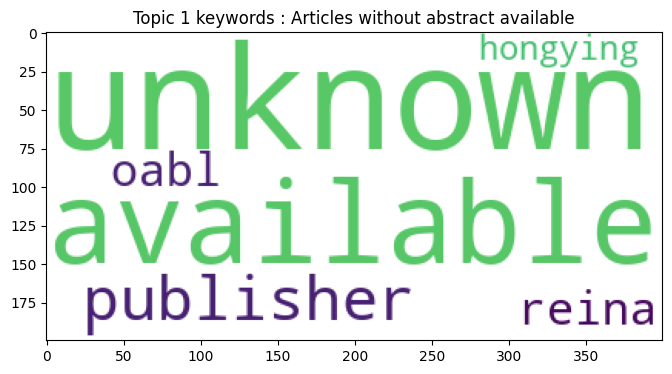

Topic 2: Number of article in this topic: 11277 , percentage: 5.54


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


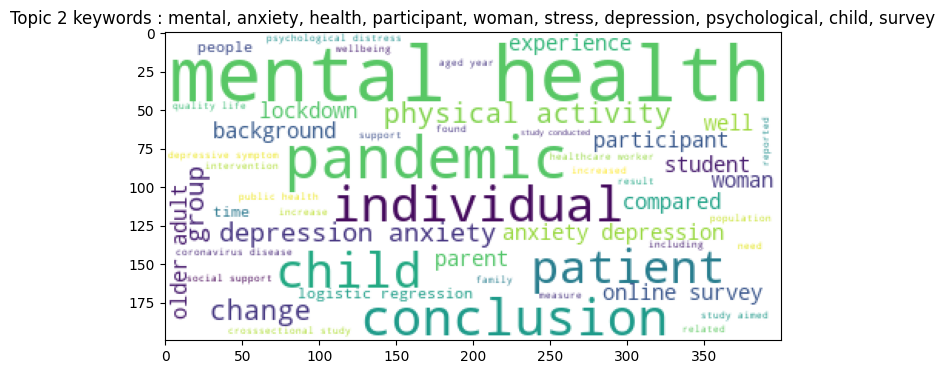

Topic 3: Number of article in this topic: 369 , percentage: 0.18


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


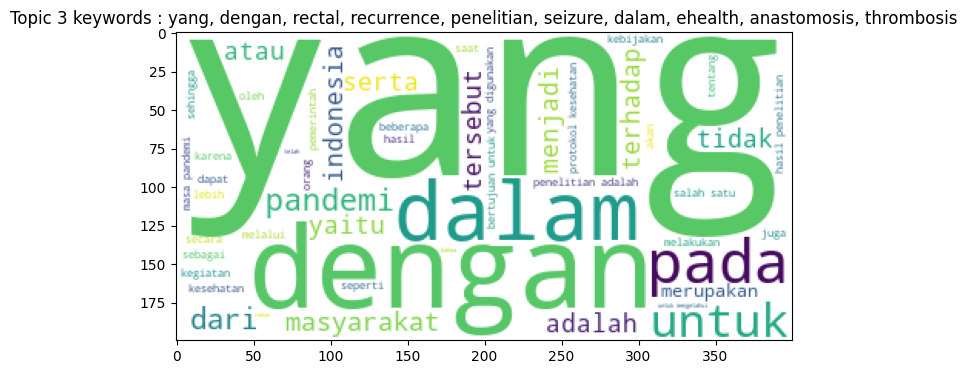

Topic 4: Number of article in this topic: 68553 , percentage: 33.69


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


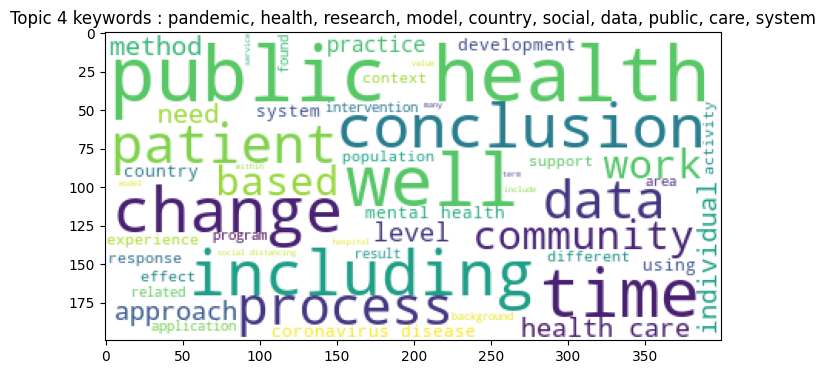

Topic 5: Number of article in this topic: 14 , percentage: 0.01


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


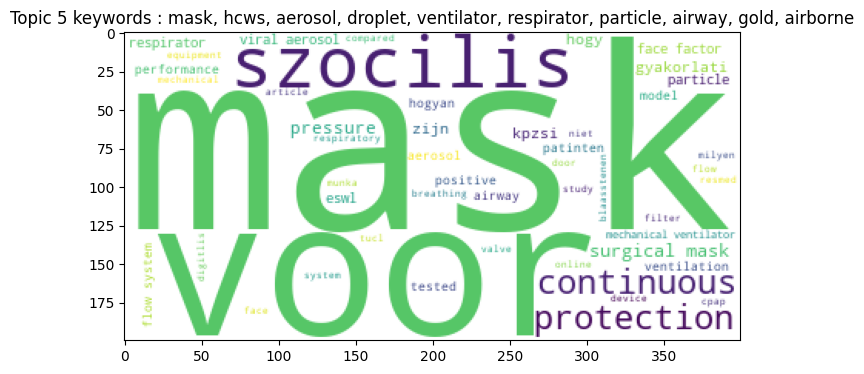

Topic 6: Number of article in this topic: 32 , percentage: 0.02


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


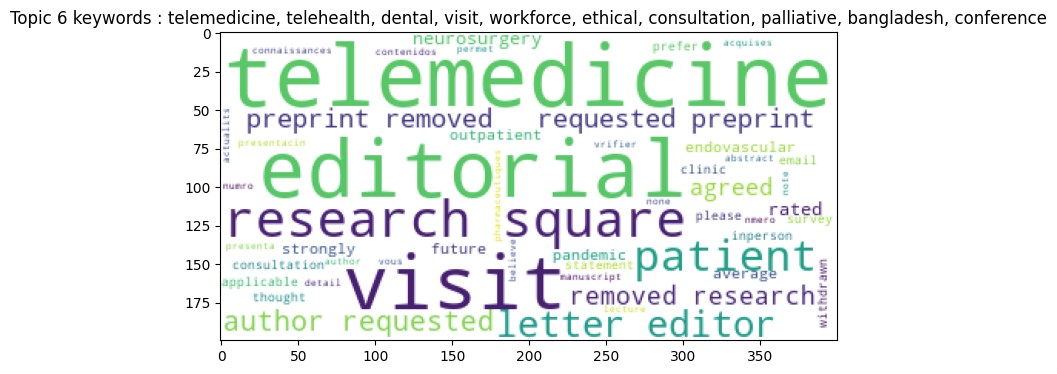

Topic 7: Number of article in this topic: 18 , percentage: 0.01


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


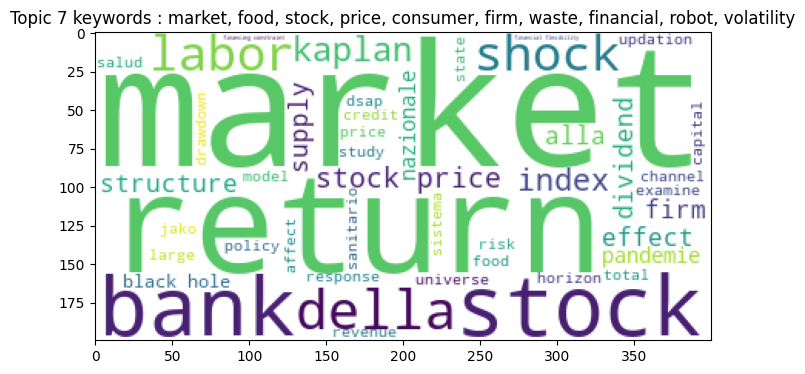

Topic 8: Number of article in this topic: 1 , percentage: 0.00


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


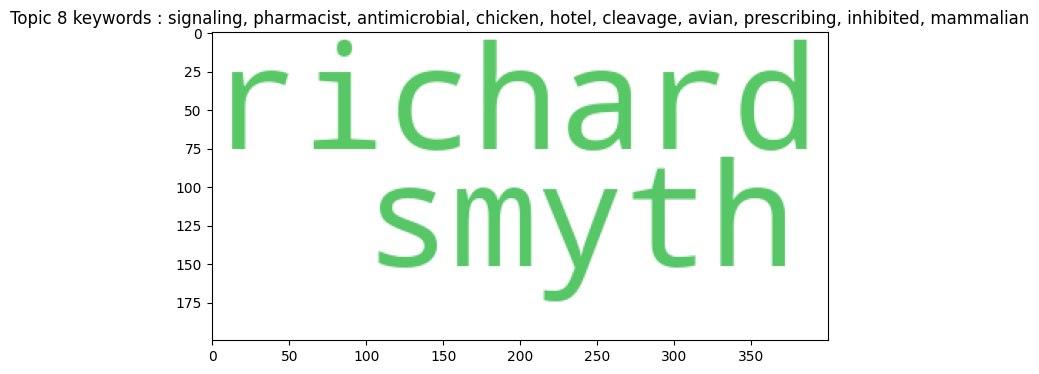

Topic 9: Number of article in this topic: 171 , percentage: 0.08


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


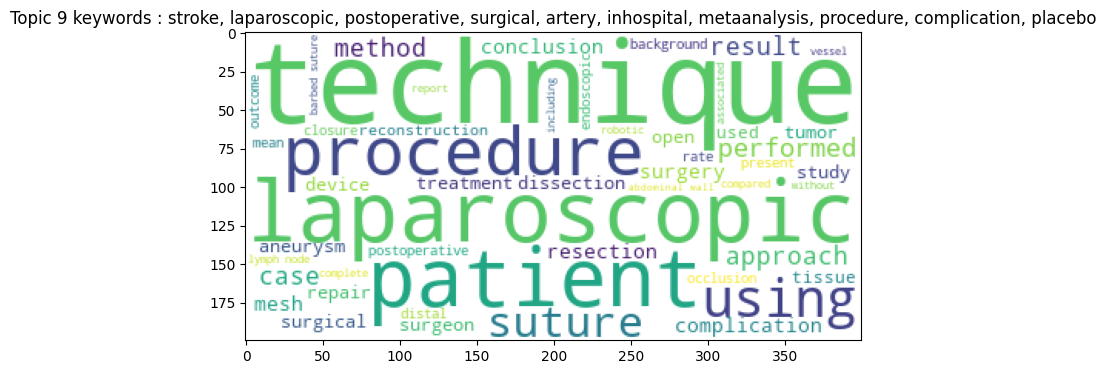

Topic 10: Number of article in this topic: 917 , percentage: 0.45


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


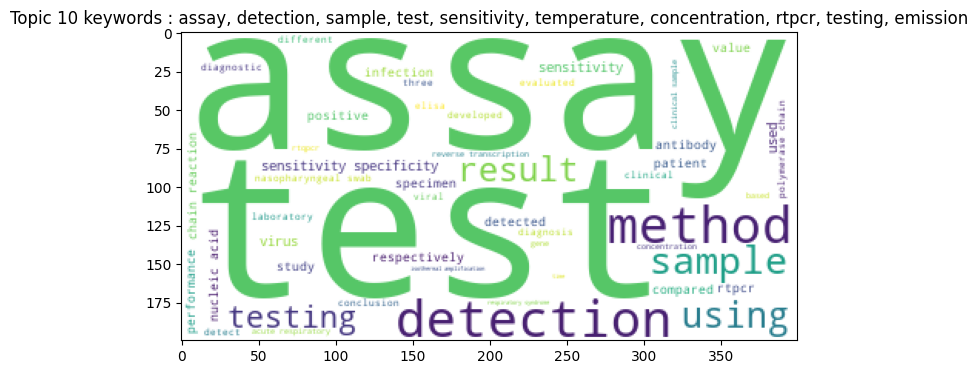

Topic 11: Number of article in this topic: 682 , percentage: 0.34


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


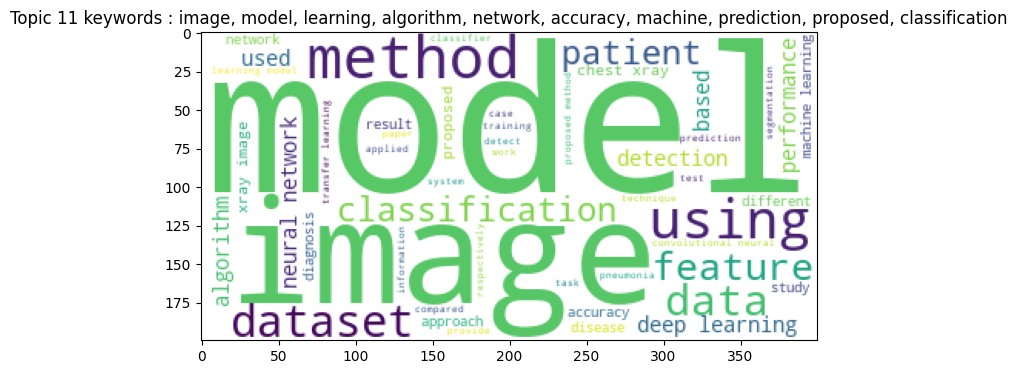

Topic 12: Number of article in this topic: 499 , percentage: 0.25


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


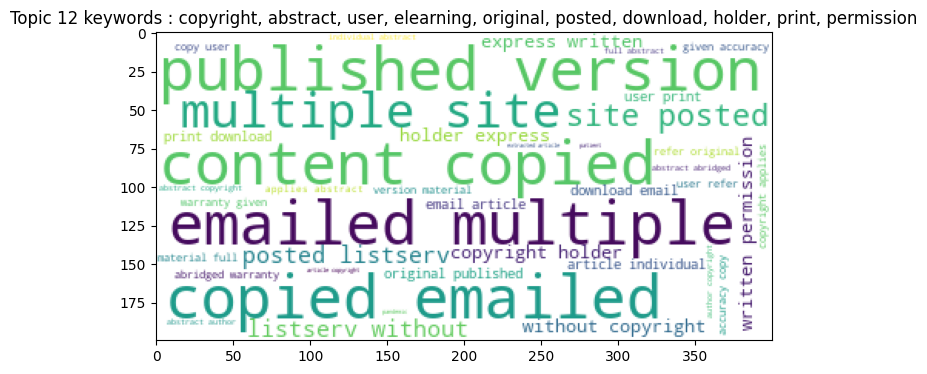

Topic 13: Number of article in this topic: 561 , percentage: 0.28


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


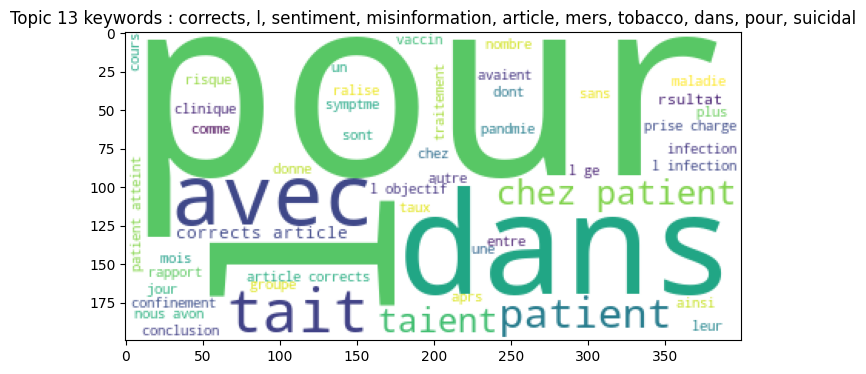

Topic 14: Number of article in this topic: 820 , percentage: 0.40


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


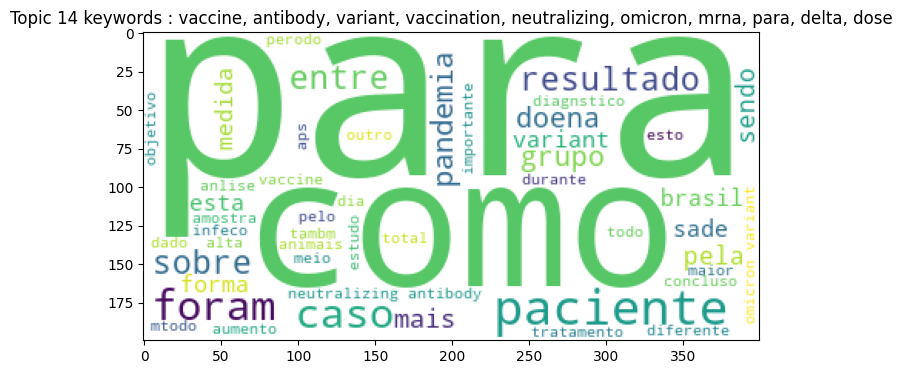

Topic 15: Number of article in this topic: 1 , percentage: 0.00


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


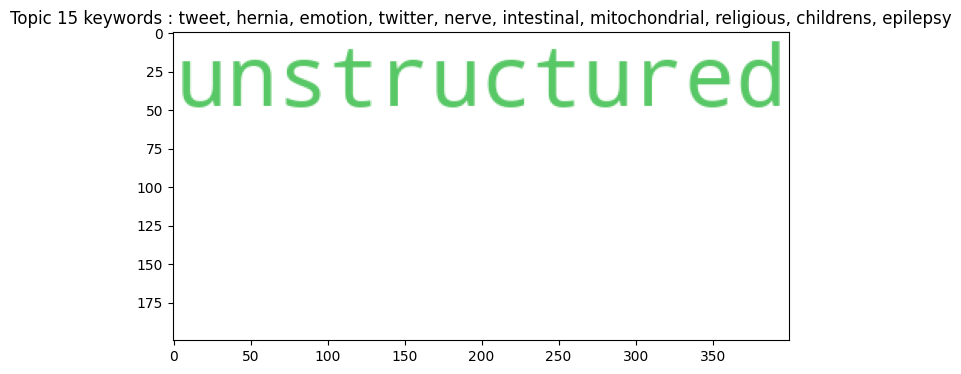

Topic 16: Number of article in this topic: 13 , percentage: 0.01


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


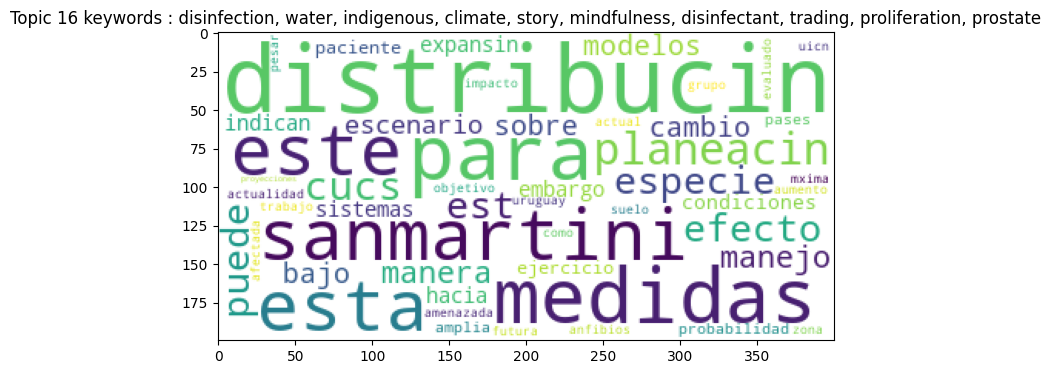

Topic 17: Number of article in this topic: 48400 , percentage: 23.79


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


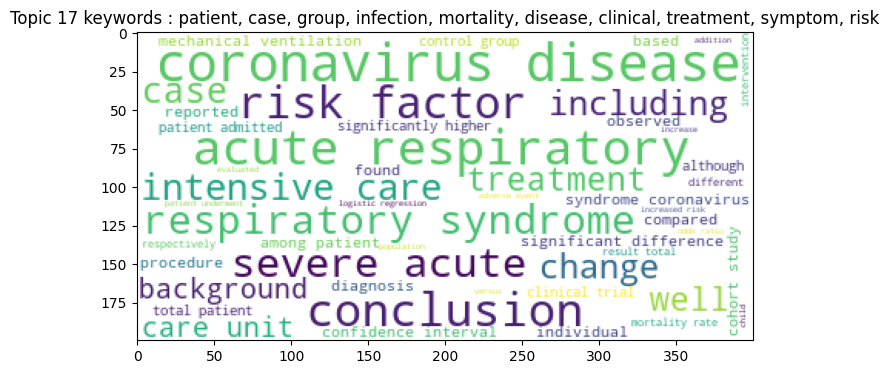

Topic 18: Number of article in this topic: 2 , percentage: 0.00


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


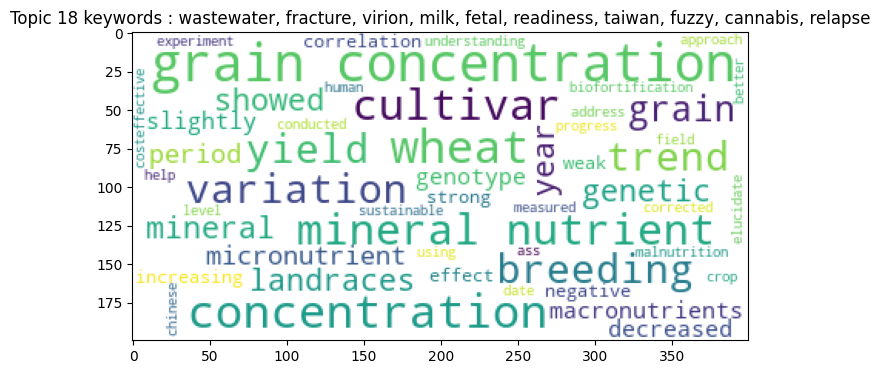

Topic 19: Number of article in this topic: 71 , percentage: 0.03


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


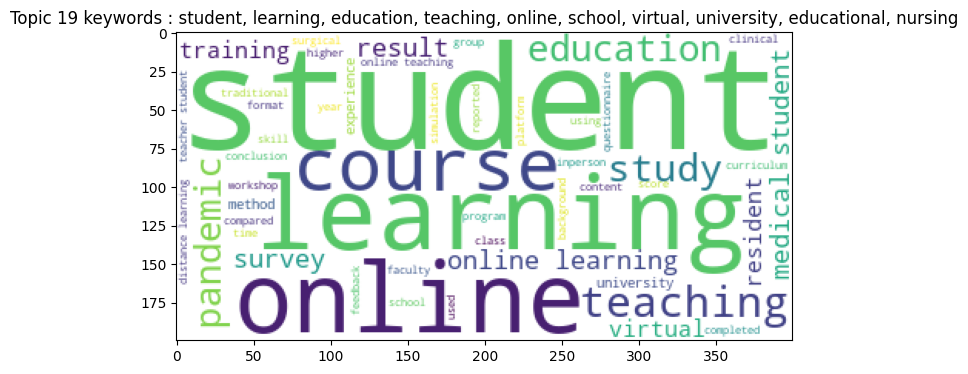

Topic 20: Number of article in this topic: 30516 , percentage: 15.00


C:\Users\acvil\AppData\Local\Temp\ipykernel_27824\3276523492.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=cm.get_cmap('viridis')
C:\Users\acvil\anaconda3New\envs\tf-test\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


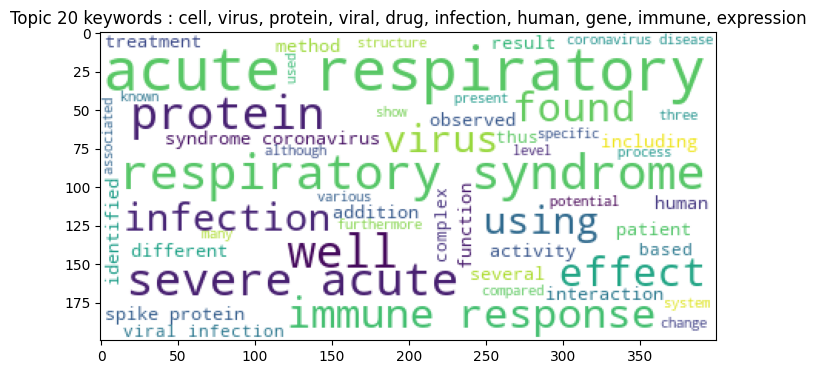

In [308]:
wordCloudTopics(topic_df,0.3)

Based on the evaluation of the 20 topics, it can be concluded that the topic modeling process was successful. The topics were diverse and distinguishable from each other. To further enhance the analysis, it is recommended to reduce the number of clusters to either 17 or 16. This will help prevent any overlap between clusters, taking into consideration the perplexity and coherence measures as well.

**Done by Andres V-.**